# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

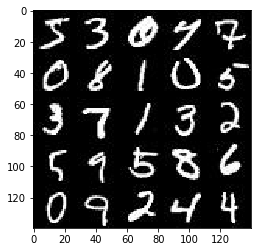

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

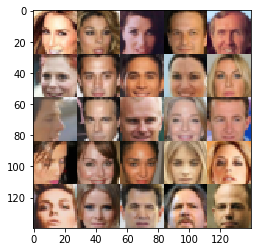

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.4.0


C:\Anaconda3\envs\face_generation\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #print(z_dim)
    input_images = \
        tf.placeholder\
            (tf.float32, 
             [None,image_width,image_height,image_channels], 
             'input_images')
    z_data = tf.placeholder(tf.float32, [None,z_dim], 'z_data')
    learning_rate = tf.placeholder(tf.float32, [], 'learning_rate')

    return input_images, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def leaky_RELU(t, alpha=.2):
    return tf.maximum(alpha*t, t)

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #images_shape = images.get_shape().as_list()[1:]
    #print_shape = lambda t: print(t.get_shape().as_list()[1:])
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input is 28x28x3
        #print_shape(images)
        conv1 = \
            tf.layers.conv2d\
                (images, 64, kernel_size=5, strides=2, padding='same',
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer_conv2d())
        conv1 = leaky_RELU(conv1)
        #print_shape(conv1)
        # Now 14x14x64
        conv2 = \
            tf.layers.conv2d\
                (conv1, 128, kernel_size=5, strides=2, padding='same',
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer_conv2d(),
                 use_bias=False)
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = leaky_RELU(conv2)
        #print_shape(conv2)
        # Now 7x7x128
        conv3 = \
            tf.layers.conv2d\
                (conv2, 256, kernel_size=5, strides=2, padding='same',
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer_conv2d(),
                 use_bias=False)
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = leaky_RELU(conv3)
        #print_shape(conv3)
        # Now 4x4x256
        flatten = tf.contrib.layers.flatten(conv3)
        logits = \
            tf.layers.dense\
                (flatten, 1,
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer())
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        fc = \
            tf.layers.dense\
                (inputs=z, units=4*4*512,
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer(),
                 use_bias=False)
        fc = tf.reshape(fc, [-1,4,4,512])
        fc = tf.layers.batch_normalization(fc, training=is_train)
        #fc = leaky_RELU(fc)
        fc = tf.nn.relu(fc)
        # Now 4x4x512
        conv1 = tf.image.resize_nearest_neighbor(fc, (8,8))
        conv1 = \
            tf.layers.conv2d\
                (conv1, 256, kernel_size=3, padding='same',
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer_conv2d(),
                 use_bias=False)
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        #conv1 = leaky_RELU(conv1)
        conv1 = tf.nn.relu(conv1)
        # Now 8x8x256
        conv2 = tf.image.resize_nearest_neighbor(conv1, (16,16))
        conv2 = \
            tf.layers.conv2d\
                (conv2, 128, kernel_size=3, padding='same',
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer_conv2d(),
                 use_bias=False)
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        #conv2 = leaky_RELU(conv2)
        conv2 = tf.nn.relu(conv2)
        # Now 16x16x128
        conv3 = tf.image.resize_nearest_neighbor(conv2, (28,28))
        conv3 = \
            tf.layers.conv2d\
                (conv3, out_channel_dim, kernel_size=3, padding='same',
                 kernel_initializer=\
                     tf.contrib.layers.xavier_initializer_conv2d())
        out = tf.tanh(conv3)
        #Now 28x28xout_channel_dim
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_out = generator(input_z, out_channel_dim)
    d_real_out, d_real_logits = discriminator(input_real)
    d_fake_out, d_fake_logits = discriminator(g_out, reuse=True)
    
    g_loss = \
        tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits\
            (logits=d_fake_logits, labels=tf.ones_like(d_fake_out)))
    d_real_loss = \
        tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits\
            (logits=d_real_logits, 
             labels=tf.ones_like(d_real_out) * (1 - smooth)))
    d_fake_loss = \
        tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits\
            (logits=d_fake_logits, labels=tf.zeros_like(d_fake_out)))
    d_loss = d_real_loss + d_fake_loss 
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    trainable_vars_in_scope = lambda scope_name: \
        [var for var in t_vars if var.name.startswith(scope_name)]
    d_vars = trainable_vars_in_scope('discriminator')
    g_vars = trainable_vars_in_scope('generator')
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = lambda loss, var_list: \
            tf.train.AdamOptimizer\
                (learning_rate, beta1=beta1).minimize(loss=loss, 
                                                      var_list=var_list)
        d_optimizer = optimizer(d_loss, d_vars)
        g_optimizer = optimizer(g_loss, g_vars)
            
    
    return d_optimizer, g_optimizer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #tf.reset_default_graph()   
    #image_channels = 3 if data_image_mode == "RGB" else 1
    image_width, image_height, image_channels = data_shape[1:]
    #print(image_width, image_height, image_channels)
    input_images, z_data, rate = \
        model_inputs\
            (image_width=image_width, 
             image_height=image_height, 
             image_channels=image_channels, 
             z_dim=z_dim)
    
    d_loss, g_loss = \
        model_loss(input_images, z_data, image_channels)
    d_optimizer, g_optimizer = \
        model_opt(d_loss, g_loss, rate, beta1)
        
    #sample_z = np.random.uniform(-0.5, 0.5, size=(72, z_dim))
    #samples, losses = [], []
    steps = 0
    print_every = 10
    show_every = 40
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = \
                    np.random.uniform(-1, 1, size=[batch_size, z_dim])
                # Run optimizers
                _ = sess.run(d_optimizer, 
                             feed_dict={input_images: batch_images, 
                                        z_data: batch_z,
                                        rate: learning_rate})
                for __ in range(4):
                    _ = sess.run(g_optimizer, 
                                 feed_dict={input_images: batch_images, 
                                            z_data: batch_z,
                                            rate: learning_rate})
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = \
                        d_loss.eval({input_images: batch_images, 
                                     z_data: batch_z})
                    train_loss_g = \
                        g_loss.eval({z_data: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    #losses.append((train_loss_d, train_loss_g))
                if steps % show_every == 0:
                    show_generator_output\
                        (sess, 
                         n_images=15, 
                         input_z=z_data, 
                         out_channel_dim=image_channels, 
                         image_mode=data_image_mode)
        saver.save(sess, './checkpoints/generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 4.2553... Generator Loss: 0.0650
Epoch 1/2... Discriminator Loss: 3.7469... Generator Loss: 0.0551
Epoch 1/2... Discriminator Loss: 3.9741... Generator Loss: 0.0343
Epoch 1/2... Discriminator Loss: 3.5119... Generator Loss: 0.0496


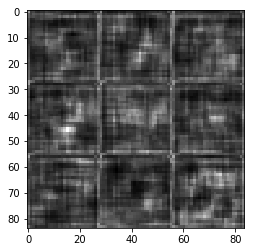

Epoch 1/2... Discriminator Loss: 3.7808... Generator Loss: 0.0354
Epoch 1/2... Discriminator Loss: 3.1457... Generator Loss: 0.0746
Epoch 1/2... Discriminator Loss: 3.6903... Generator Loss: 0.0379
Epoch 1/2... Discriminator Loss: 3.0738... Generator Loss: 0.1614


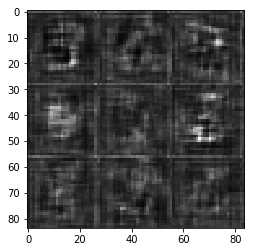

Epoch 1/2... Discriminator Loss: 3.1029... Generator Loss: 0.0742
Epoch 1/2... Discriminator Loss: 3.4397... Generator Loss: 0.0485
Epoch 1/2... Discriminator Loss: 3.2293... Generator Loss: 0.0594
Epoch 1/2... Discriminator Loss: 3.3781... Generator Loss: 0.0518


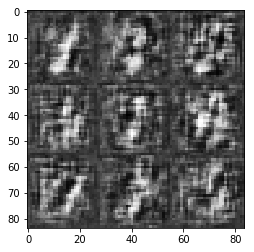

Epoch 1/2... Discriminator Loss: 3.5935... Generator Loss: 0.0423
Epoch 1/2... Discriminator Loss: 3.6590... Generator Loss: 0.0382
Epoch 1/2... Discriminator Loss: 3.0811... Generator Loss: 0.0833
Epoch 1/2... Discriminator Loss: 3.2011... Generator Loss: 0.0622


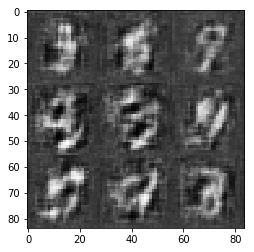

Epoch 1/2... Discriminator Loss: 2.7389... Generator Loss: 0.1327
Epoch 1/2... Discriminator Loss: 3.1553... Generator Loss: 0.0695
Epoch 1/2... Discriminator Loss: 2.8126... Generator Loss: 0.1084
Epoch 1/2... Discriminator Loss: 2.4793... Generator Loss: 0.2570


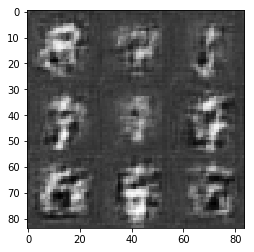

Epoch 1/2... Discriminator Loss: 3.0627... Generator Loss: 0.0774
Epoch 1/2... Discriminator Loss: 2.3935... Generator Loss: 0.1804
Epoch 1/2... Discriminator Loss: 2.5740... Generator Loss: 0.1256
Epoch 1/2... Discriminator Loss: 2.5035... Generator Loss: 0.1368


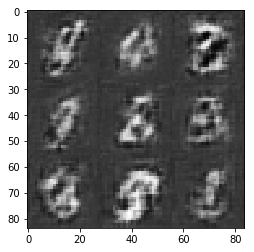

Epoch 1/2... Discriminator Loss: 2.8588... Generator Loss: 0.0973
Epoch 1/2... Discriminator Loss: 2.3162... Generator Loss: 0.1667
Epoch 1/2... Discriminator Loss: 1.8863... Generator Loss: 0.3842
Epoch 1/2... Discriminator Loss: 2.7950... Generator Loss: 0.0983


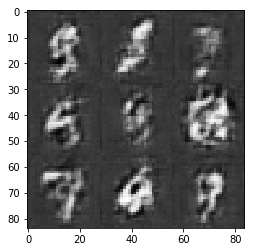

Epoch 1/2... Discriminator Loss: 2.3626... Generator Loss: 0.1514
Epoch 1/2... Discriminator Loss: 2.1927... Generator Loss: 0.2024
Epoch 1/2... Discriminator Loss: 2.2667... Generator Loss: 0.1792
Epoch 1/2... Discriminator Loss: 2.3085... Generator Loss: 0.1680


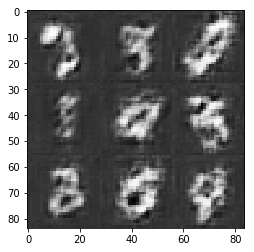

Epoch 1/2... Discriminator Loss: 2.1879... Generator Loss: 0.1808
Epoch 1/2... Discriminator Loss: 2.4079... Generator Loss: 0.1451
Epoch 1/2... Discriminator Loss: 2.3506... Generator Loss: 0.1555
Epoch 1/2... Discriminator Loss: 2.1514... Generator Loss: 0.1814


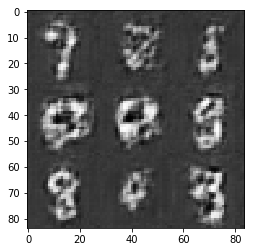

Epoch 1/2... Discriminator Loss: 1.6143... Generator Loss: 0.7006
Epoch 1/2... Discriminator Loss: 2.0235... Generator Loss: 0.2270
Epoch 1/2... Discriminator Loss: 1.7024... Generator Loss: 0.3163
Epoch 1/2... Discriminator Loss: 2.1435... Generator Loss: 0.1959


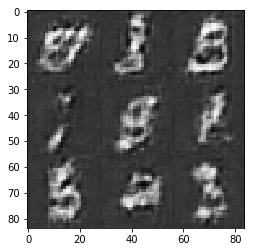

Epoch 1/2... Discriminator Loss: 2.2496... Generator Loss: 0.1777
Epoch 1/2... Discriminator Loss: 2.2248... Generator Loss: 0.1807
Epoch 1/2... Discriminator Loss: 2.4813... Generator Loss: 0.2227
Epoch 1/2... Discriminator Loss: 1.3922... Generator Loss: 0.5466


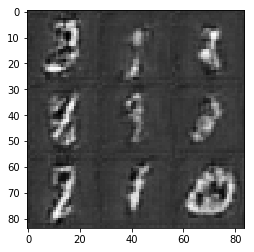

Epoch 1/2... Discriminator Loss: 2.2252... Generator Loss: 0.1744
Epoch 1/2... Discriminator Loss: 1.7733... Generator Loss: 0.2971
Epoch 1/2... Discriminator Loss: 1.4703... Generator Loss: 0.4260
Epoch 1/2... Discriminator Loss: 2.0700... Generator Loss: 0.2176


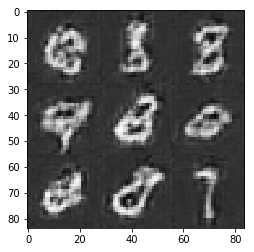

Epoch 1/2... Discriminator Loss: 1.8710... Generator Loss: 0.2571
Epoch 1/2... Discriminator Loss: 2.2619... Generator Loss: 0.1695
Epoch 1/2... Discriminator Loss: 1.5754... Generator Loss: 0.3863
Epoch 1/2... Discriminator Loss: 1.2363... Generator Loss: 0.6922


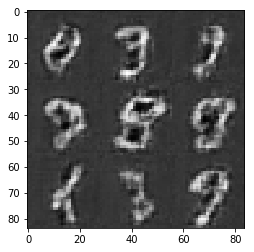

Epoch 1/2... Discriminator Loss: 1.4683... Generator Loss: 0.4933
Epoch 1/2... Discriminator Loss: 1.8778... Generator Loss: 0.2813
Epoch 1/2... Discriminator Loss: 1.0832... Generator Loss: 0.7842
Epoch 1/2... Discriminator Loss: 2.0341... Generator Loss: 0.2363


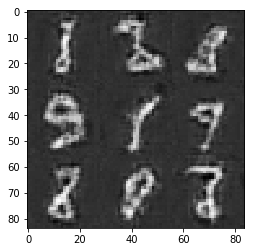

Epoch 1/2... Discriminator Loss: 2.7818... Generator Loss: 0.1005
Epoch 1/2... Discriminator Loss: 2.4986... Generator Loss: 0.1401
Epoch 1/2... Discriminator Loss: 1.6337... Generator Loss: 0.3605
Epoch 1/2... Discriminator Loss: 2.7491... Generator Loss: 0.1021


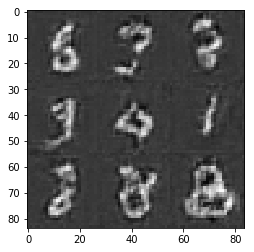

Epoch 1/2... Discriminator Loss: 1.4016... Generator Loss: 0.4475
Epoch 1/2... Discriminator Loss: 1.4576... Generator Loss: 0.4722
Epoch 1/2... Discriminator Loss: 0.5243... Generator Loss: 2.0175
Epoch 1/2... Discriminator Loss: 2.7684... Generator Loss: 0.0998


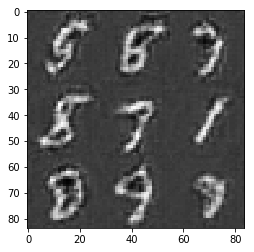

Epoch 1/2... Discriminator Loss: 1.6466... Generator Loss: 0.3691
Epoch 1/2... Discriminator Loss: 1.3428... Generator Loss: 0.7685
Epoch 1/2... Discriminator Loss: 2.0355... Generator Loss: 0.2206
Epoch 1/2... Discriminator Loss: 1.8276... Generator Loss: 0.3408


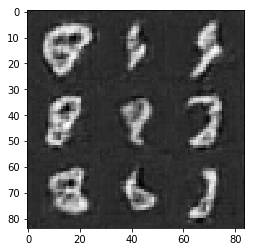

Epoch 1/2... Discriminator Loss: 1.2628... Generator Loss: 3.6661
Epoch 1/2... Discriminator Loss: 1.3057... Generator Loss: 0.5055
Epoch 1/2... Discriminator Loss: 0.5806... Generator Loss: 1.8996
Epoch 1/2... Discriminator Loss: 2.1700... Generator Loss: 0.1895


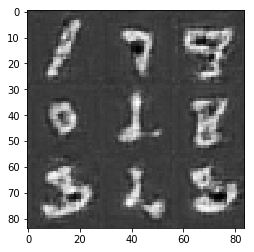

Epoch 1/2... Discriminator Loss: 1.5309... Generator Loss: 3.4953
Epoch 1/2... Discriminator Loss: 1.7778... Generator Loss: 0.2837
Epoch 1/2... Discriminator Loss: 1.8843... Generator Loss: 0.2760
Epoch 1/2... Discriminator Loss: 1.7468... Generator Loss: 0.3264


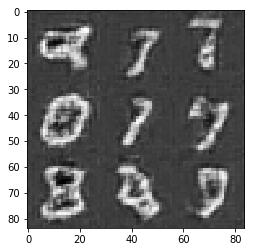

Epoch 1/2... Discriminator Loss: 0.5808... Generator Loss: 1.7041
Epoch 1/2... Discriminator Loss: 1.2187... Generator Loss: 0.5818
Epoch 1/2... Discriminator Loss: 2.3818... Generator Loss: 0.1522
Epoch 1/2... Discriminator Loss: 1.6105... Generator Loss: 0.3686


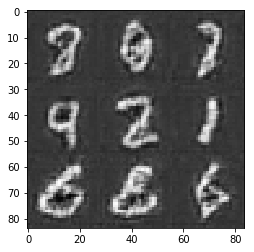

Epoch 1/2... Discriminator Loss: 2.0389... Generator Loss: 0.2228
Epoch 1/2... Discriminator Loss: 0.6757... Generator Loss: 2.6245
Epoch 1/2... Discriminator Loss: 1.1998... Generator Loss: 0.9214
Epoch 1/2... Discriminator Loss: 0.6832... Generator Loss: 1.9987


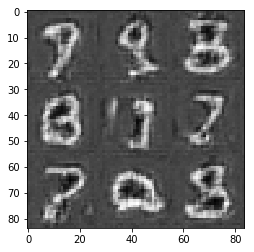

Epoch 1/2... Discriminator Loss: 2.2636... Generator Loss: 0.1881
Epoch 1/2... Discriminator Loss: 0.8889... Generator Loss: 1.1682
Epoch 1/2... Discriminator Loss: 0.9240... Generator Loss: 0.9496
Epoch 1/2... Discriminator Loss: 1.1871... Generator Loss: 1.2723


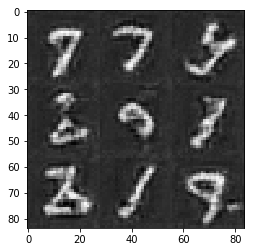

Epoch 1/2... Discriminator Loss: 1.3060... Generator Loss: 0.7671
Epoch 1/2... Discriminator Loss: 1.7106... Generator Loss: 0.3209
Epoch 1/2... Discriminator Loss: 0.9420... Generator Loss: 1.2163
Epoch 1/2... Discriminator Loss: 1.6553... Generator Loss: 0.3943


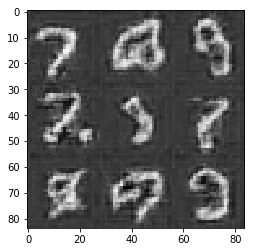

Epoch 1/2... Discriminator Loss: 0.9987... Generator Loss: 0.8516
Epoch 1/2... Discriminator Loss: 2.5706... Generator Loss: 0.1222
Epoch 1/2... Discriminator Loss: 1.8772... Generator Loss: 0.2757
Epoch 1/2... Discriminator Loss: 2.3005... Generator Loss: 0.1866


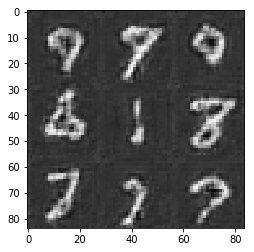

Epoch 1/2... Discriminator Loss: 1.3818... Generator Loss: 0.5135
Epoch 1/2... Discriminator Loss: 2.2757... Generator Loss: 0.1714
Epoch 1/2... Discriminator Loss: 2.1647... Generator Loss: 0.1925
Epoch 1/2... Discriminator Loss: 1.4877... Generator Loss: 0.4165


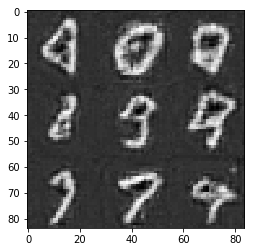

Epoch 1/2... Discriminator Loss: 0.9141... Generator Loss: 0.9675
Epoch 1/2... Discriminator Loss: 2.5307... Generator Loss: 0.1613
Epoch 1/2... Discriminator Loss: 0.8073... Generator Loss: 1.1638
Epoch 1/2... Discriminator Loss: 0.5297... Generator Loss: 2.9596


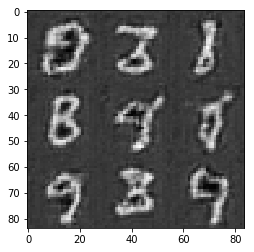

Epoch 1/2... Discriminator Loss: 0.4927... Generator Loss: 2.1147
Epoch 1/2... Discriminator Loss: 0.4079... Generator Loss: 2.8203
Epoch 1/2... Discriminator Loss: 1.4568... Generator Loss: 0.6538
Epoch 1/2... Discriminator Loss: 0.9459... Generator Loss: 0.9098


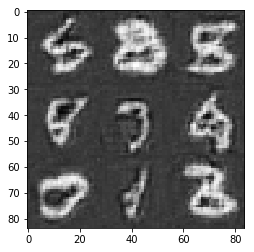

Epoch 1/2... Discriminator Loss: 0.7101... Generator Loss: 1.4270
Epoch 1/2... Discriminator Loss: 2.7396... Generator Loss: 0.1247
Epoch 1/2... Discriminator Loss: 0.8297... Generator Loss: 1.3969
Epoch 1/2... Discriminator Loss: 0.6896... Generator Loss: 1.3246


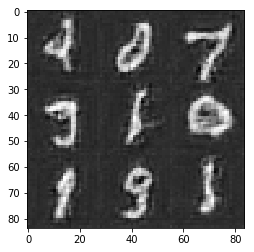

Epoch 1/2... Discriminator Loss: 1.4268... Generator Loss: 0.4463
Epoch 1/2... Discriminator Loss: 1.8472... Generator Loss: 0.2853
Epoch 1/2... Discriminator Loss: 1.2299... Generator Loss: 0.9860
Epoch 1/2... Discriminator Loss: 1.3977... Generator Loss: 0.5157


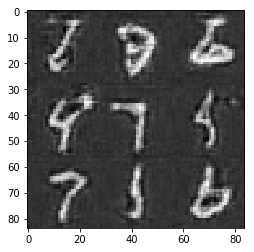

Epoch 1/2... Discriminator Loss: 0.4027... Generator Loss: 3.0907
Epoch 1/2... Discriminator Loss: 0.6392... Generator Loss: 2.4368
Epoch 1/2... Discriminator Loss: 1.5616... Generator Loss: 0.4159
Epoch 1/2... Discriminator Loss: 1.5102... Generator Loss: 0.4079


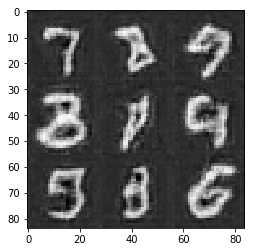

Epoch 1/2... Discriminator Loss: 0.9600... Generator Loss: 0.9552
Epoch 1/2... Discriminator Loss: 2.0428... Generator Loss: 0.2165
Epoch 1/2... Discriminator Loss: 1.9148... Generator Loss: 0.2691
Epoch 1/2... Discriminator Loss: 1.0463... Generator Loss: 2.2232


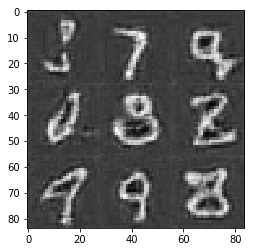

Epoch 1/2... Discriminator Loss: 0.9322... Generator Loss: 1.5551
Epoch 1/2... Discriminator Loss: 1.2512... Generator Loss: 0.6131
Epoch 1/2... Discriminator Loss: 1.4957... Generator Loss: 0.4492
Epoch 1/2... Discriminator Loss: 1.9241... Generator Loss: 0.2620


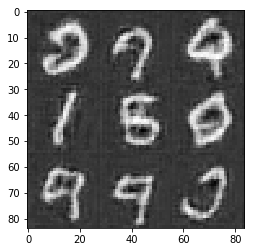

Epoch 1/2... Discriminator Loss: 0.4616... Generator Loss: 3.5701
Epoch 1/2... Discriminator Loss: 3.1530... Generator Loss: 0.0711
Epoch 1/2... Discriminator Loss: 1.4859... Generator Loss: 0.4981
Epoch 1/2... Discriminator Loss: 1.2885... Generator Loss: 0.5405


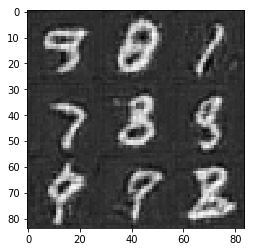

Epoch 1/2... Discriminator Loss: 1.7750... Generator Loss: 0.3134
Epoch 1/2... Discriminator Loss: 1.1527... Generator Loss: 0.6331
Epoch 1/2... Discriminator Loss: 0.3599... Generator Loss: 3.8297
Epoch 1/2... Discriminator Loss: 0.9171... Generator Loss: 0.8622


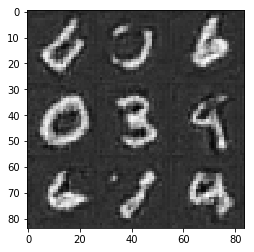

Epoch 1/2... Discriminator Loss: 0.9659... Generator Loss: 0.8238
Epoch 1/2... Discriminator Loss: 2.3979... Generator Loss: 0.1711
Epoch 1/2... Discriminator Loss: 2.7009... Generator Loss: 0.1198
Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 0.9180


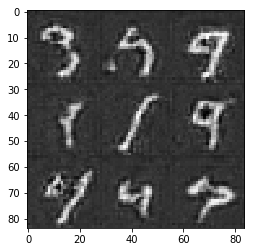

Epoch 1/2... Discriminator Loss: 0.3619... Generator Loss: 4.8099
Epoch 1/2... Discriminator Loss: 2.7049... Generator Loss: 0.1129
Epoch 1/2... Discriminator Loss: 3.3254... Generator Loss: 1.0286
Epoch 1/2... Discriminator Loss: 1.2513... Generator Loss: 0.5703


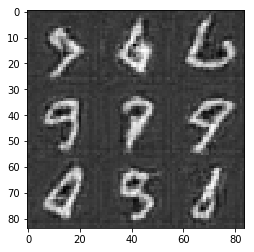

Epoch 1/2... Discriminator Loss: 1.3326... Generator Loss: 0.6672
Epoch 1/2... Discriminator Loss: 1.7800... Generator Loss: 0.3196
Epoch 1/2... Discriminator Loss: 2.4802... Generator Loss: 0.1372
Epoch 1/2... Discriminator Loss: 1.1580... Generator Loss: 0.7220


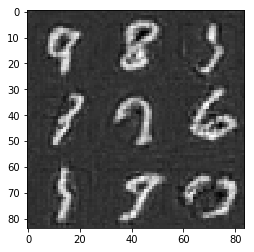

Epoch 1/2... Discriminator Loss: 1.1343... Generator Loss: 0.7142
Epoch 1/2... Discriminator Loss: 2.0621... Generator Loss: 0.2524
Epoch 1/2... Discriminator Loss: 0.6971... Generator Loss: 1.3675
Epoch 1/2... Discriminator Loss: 2.4147... Generator Loss: 0.1518


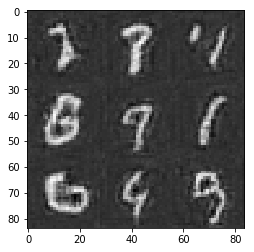

Epoch 1/2... Discriminator Loss: 0.7410... Generator Loss: 3.7849
Epoch 1/2... Discriminator Loss: 1.7645... Generator Loss: 0.2943
Epoch 1/2... Discriminator Loss: 2.5166... Generator Loss: 0.1270
Epoch 1/2... Discriminator Loss: 1.0986... Generator Loss: 1.3493


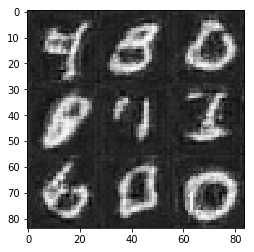

Epoch 1/2... Discriminator Loss: 1.3400... Generator Loss: 0.7585
Epoch 1/2... Discriminator Loss: 0.9915... Generator Loss: 1.0876
Epoch 1/2... Discriminator Loss: 1.4552... Generator Loss: 0.4485
Epoch 1/2... Discriminator Loss: 1.2381... Generator Loss: 1.0479


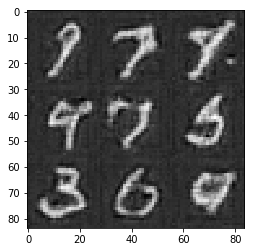

Epoch 1/2... Discriminator Loss: 1.0504... Generator Loss: 1.0173
Epoch 1/2... Discriminator Loss: 1.1715... Generator Loss: 0.7712
Epoch 1/2... Discriminator Loss: 1.3975... Generator Loss: 0.4774
Epoch 1/2... Discriminator Loss: 0.9196... Generator Loss: 0.9305


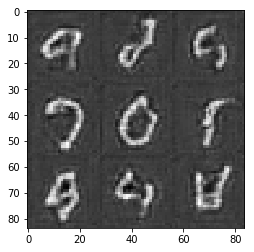

Epoch 1/2... Discriminator Loss: 2.3354... Generator Loss: 0.1633
Epoch 1/2... Discriminator Loss: 0.8321... Generator Loss: 3.0389
Epoch 1/2... Discriminator Loss: 1.6890... Generator Loss: 0.3593
Epoch 1/2... Discriminator Loss: 0.4309... Generator Loss: 2.6262


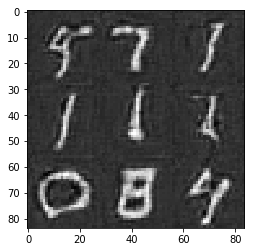

Epoch 1/2... Discriminator Loss: 1.9546... Generator Loss: 0.2424
Epoch 1/2... Discriminator Loss: 1.2930... Generator Loss: 0.5637
Epoch 1/2... Discriminator Loss: 1.8870... Generator Loss: 0.2939
Epoch 1/2... Discriminator Loss: 0.3549... Generator Loss: 5.3880


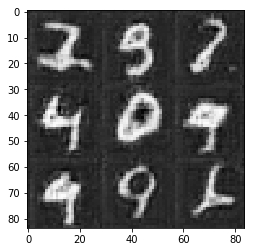

Epoch 1/2... Discriminator Loss: 2.7824... Generator Loss: 0.1502
Epoch 1/2... Discriminator Loss: 2.2704... Generator Loss: 0.2097
Epoch 1/2... Discriminator Loss: 1.4518... Generator Loss: 0.4673
Epoch 1/2... Discriminator Loss: 0.3784... Generator Loss: 3.3738


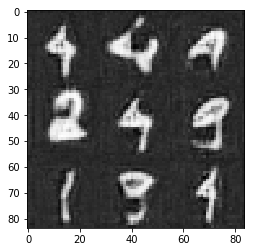

Epoch 1/2... Discriminator Loss: 0.7963... Generator Loss: 1.0704
Epoch 1/2... Discriminator Loss: 0.4176... Generator Loss: 2.7919
Epoch 1/2... Discriminator Loss: 1.8801... Generator Loss: 0.2623
Epoch 1/2... Discriminator Loss: 2.1076... Generator Loss: 0.2057


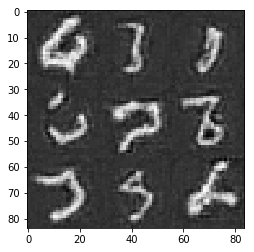

Epoch 1/2... Discriminator Loss: 0.4022... Generator Loss: 3.1476
Epoch 1/2... Discriminator Loss: 0.3670... Generator Loss: 4.8938
Epoch 1/2... Discriminator Loss: 0.6969... Generator Loss: 1.3894
Epoch 1/2... Discriminator Loss: 1.1388... Generator Loss: 0.7346


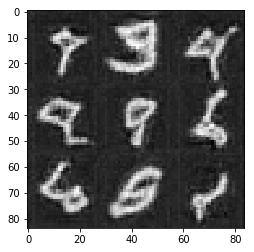

Epoch 1/2... Discriminator Loss: 1.3144... Generator Loss: 0.5723
Epoch 1/2... Discriminator Loss: 1.0366... Generator Loss: 0.8565
Epoch 1/2... Discriminator Loss: 1.1192... Generator Loss: 1.7419
Epoch 1/2... Discriminator Loss: 1.8860... Generator Loss: 0.3559


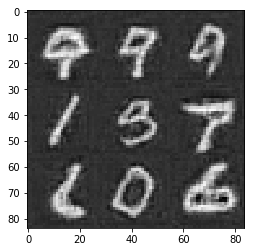

Epoch 1/2... Discriminator Loss: 1.1811... Generator Loss: 0.6136
Epoch 1/2... Discriminator Loss: 1.3662... Generator Loss: 0.5231
Epoch 1/2... Discriminator Loss: 0.8798... Generator Loss: 1.0092
Epoch 1/2... Discriminator Loss: 0.7187... Generator Loss: 1.3042


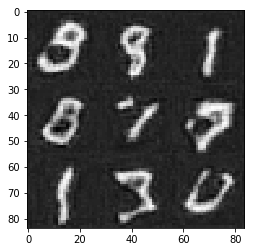

Epoch 1/2... Discriminator Loss: 0.9207... Generator Loss: 1.1277
Epoch 1/2... Discriminator Loss: 2.8522... Generator Loss: 0.1085
Epoch 1/2... Discriminator Loss: 1.9866... Generator Loss: 0.2444
Epoch 1/2... Discriminator Loss: 1.0885... Generator Loss: 0.8694


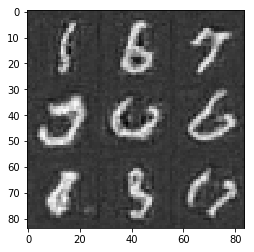

Epoch 1/2... Discriminator Loss: 0.3532... Generator Loss: 5.9986
Epoch 1/2... Discriminator Loss: 0.8576... Generator Loss: 1.2776
Epoch 1/2... Discriminator Loss: 0.3619... Generator Loss: 4.7815
Epoch 1/2... Discriminator Loss: 0.9008... Generator Loss: 0.9396


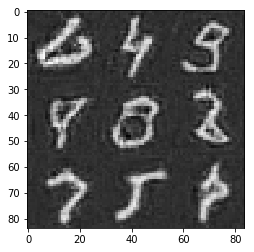

Epoch 1/2... Discriminator Loss: 2.1258... Generator Loss: 0.2049
Epoch 1/2... Discriminator Loss: 1.4907... Generator Loss: 0.4637
Epoch 1/2... Discriminator Loss: 2.7478... Generator Loss: 0.1166
Epoch 1/2... Discriminator Loss: 1.7306... Generator Loss: 0.3286


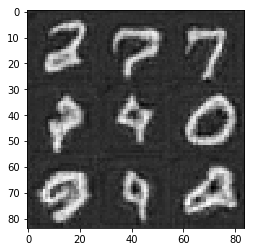

Epoch 1/2... Discriminator Loss: 1.5465... Generator Loss: 0.4601
Epoch 1/2... Discriminator Loss: 2.4657... Generator Loss: 0.1530
Epoch 1/2... Discriminator Loss: 1.1140... Generator Loss: 0.7726
Epoch 1/2... Discriminator Loss: 1.7435... Generator Loss: 0.3034


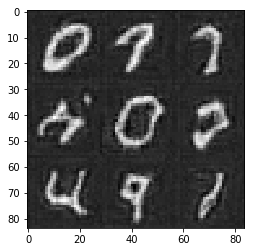

Epoch 1/2... Discriminator Loss: 2.5037... Generator Loss: 0.1315
Epoch 1/2... Discriminator Loss: 2.3403... Generator Loss: 0.1633
Epoch 1/2... Discriminator Loss: 1.8474... Generator Loss: 0.3022
Epoch 1/2... Discriminator Loss: 0.4447... Generator Loss: 2.6609


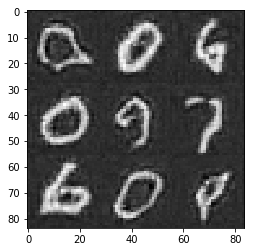

Epoch 1/2... Discriminator Loss: 2.6187... Generator Loss: 0.1209
Epoch 1/2... Discriminator Loss: 2.7179... Generator Loss: 0.1194
Epoch 1/2... Discriminator Loss: 0.7622... Generator Loss: 1.1264
Epoch 1/2... Discriminator Loss: 1.9617... Generator Loss: 0.2704


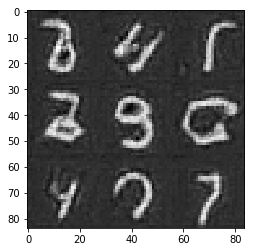

Epoch 1/2... Discriminator Loss: 0.4662... Generator Loss: 2.3718
Epoch 1/2... Discriminator Loss: 1.0534... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 1.1951... Generator Loss: 0.6360
Epoch 1/2... Discriminator Loss: 2.3176... Generator Loss: 0.2090


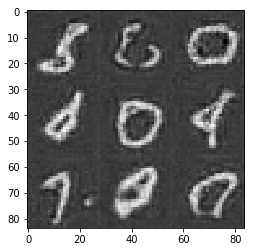

Epoch 1/2... Discriminator Loss: 1.7722... Generator Loss: 0.3326
Epoch 1/2... Discriminator Loss: 1.0561... Generator Loss: 1.0883
Epoch 1/2... Discriminator Loss: 1.1793... Generator Loss: 0.7706
Epoch 1/2... Discriminator Loss: 1.4440... Generator Loss: 0.4797


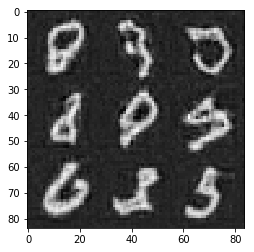

Epoch 1/2... Discriminator Loss: 1.0973... Generator Loss: 0.7500
Epoch 1/2... Discriminator Loss: 2.0086... Generator Loss: 0.2321
Epoch 1/2... Discriminator Loss: 2.4463... Generator Loss: 0.1602
Epoch 1/2... Discriminator Loss: 0.3816... Generator Loss: 4.8514


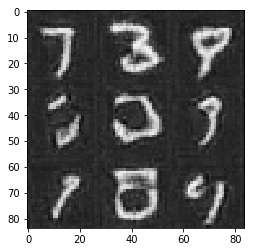

Epoch 1/2... Discriminator Loss: 2.2982... Generator Loss: 0.4900
Epoch 1/2... Discriminator Loss: 2.9070... Generator Loss: 0.1112
Epoch 1/2... Discriminator Loss: 2.0176... Generator Loss: 0.2255
Epoch 1/2... Discriminator Loss: 1.2321... Generator Loss: 1.4433


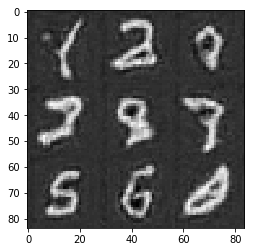

Epoch 1/2... Discriminator Loss: 1.9868... Generator Loss: 0.2312
Epoch 1/2... Discriminator Loss: 1.0352... Generator Loss: 0.8395
Epoch 1/2... Discriminator Loss: 1.0329... Generator Loss: 0.7914
Epoch 1/2... Discriminator Loss: 0.6774... Generator Loss: 1.3852


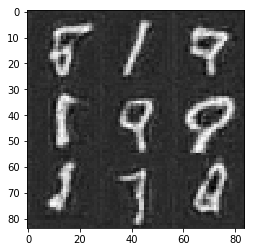

Epoch 1/2... Discriminator Loss: 0.3666... Generator Loss: 3.7748
Epoch 1/2... Discriminator Loss: 2.6159... Generator Loss: 0.1256
Epoch 1/2... Discriminator Loss: 1.6801... Generator Loss: 1.2454
Epoch 1/2... Discriminator Loss: 1.1517... Generator Loss: 1.9475


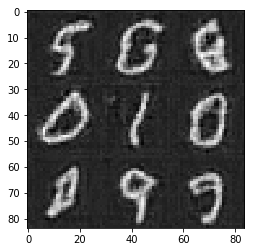

Epoch 1/2... Discriminator Loss: 1.5988... Generator Loss: 0.4186
Epoch 1/2... Discriminator Loss: 0.8667... Generator Loss: 1.3575
Epoch 1/2... Discriminator Loss: 1.1687... Generator Loss: 0.6998
Epoch 1/2... Discriminator Loss: 1.3027... Generator Loss: 0.5744


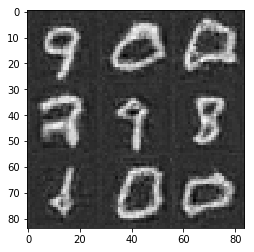

Epoch 1/2... Discriminator Loss: 1.9388... Generator Loss: 0.2491
Epoch 1/2... Discriminator Loss: 3.2905... Generator Loss: 0.0685
Epoch 1/2... Discriminator Loss: 1.3982... Generator Loss: 0.5329
Epoch 1/2... Discriminator Loss: 1.8550... Generator Loss: 0.2936


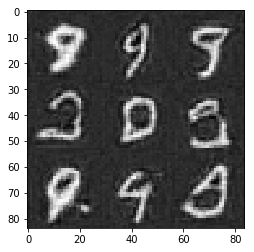

Epoch 1/2... Discriminator Loss: 0.9958... Generator Loss: 0.8622
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 0.4762
Epoch 1/2... Discriminator Loss: 0.8051... Generator Loss: 1.0623
Epoch 1/2... Discriminator Loss: 2.8464... Generator Loss: 0.0916


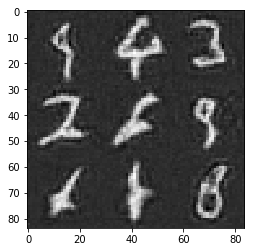

Epoch 1/2... Discriminator Loss: 1.0834... Generator Loss: 0.7913
Epoch 1/2... Discriminator Loss: 0.5303... Generator Loss: 2.5549
Epoch 1/2... Discriminator Loss: 0.9977... Generator Loss: 0.8093
Epoch 1/2... Discriminator Loss: 1.1789... Generator Loss: 0.9627


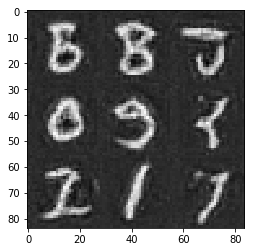

Epoch 1/2... Discriminator Loss: 1.1104... Generator Loss: 1.0855
Epoch 1/2... Discriminator Loss: 2.8152... Generator Loss: 0.1042
Epoch 1/2... Discriminator Loss: 3.3049... Generator Loss: 0.0598
Epoch 1/2... Discriminator Loss: 2.3210... Generator Loss: 0.1958


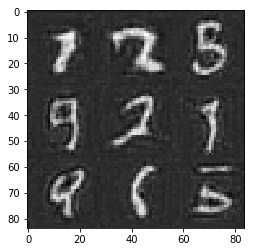

Epoch 1/2... Discriminator Loss: 1.9775... Generator Loss: 0.2935
Epoch 1/2... Discriminator Loss: 0.3560... Generator Loss: 6.7260
Epoch 1/2... Discriminator Loss: 1.6473... Generator Loss: 0.3700
Epoch 1/2... Discriminator Loss: 1.2380... Generator Loss: 0.6483


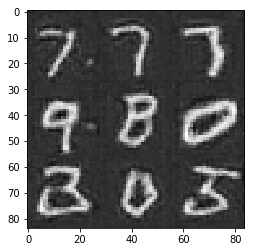

Epoch 1/2... Discriminator Loss: 2.1272... Generator Loss: 0.3724
Epoch 1/2... Discriminator Loss: 0.7502... Generator Loss: 1.2078
Epoch 1/2... Discriminator Loss: 2.2944... Generator Loss: 0.1923
Epoch 1/2... Discriminator Loss: 1.2814... Generator Loss: 0.5720


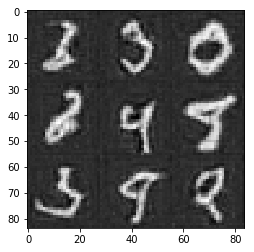

Epoch 1/2... Discriminator Loss: 2.3350... Generator Loss: 0.1648
Epoch 1/2... Discriminator Loss: 1.4790... Generator Loss: 1.0569
Epoch 1/2... Discriminator Loss: 1.3169... Generator Loss: 0.5421
Epoch 1/2... Discriminator Loss: 3.5325... Generator Loss: 0.0488


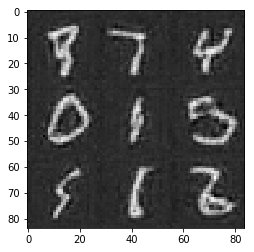

Epoch 1/2... Discriminator Loss: 2.6609... Generator Loss: 0.1453
Epoch 1/2... Discriminator Loss: 0.9895... Generator Loss: 0.9331
Epoch 1/2... Discriminator Loss: 1.2702... Generator Loss: 0.5727
Epoch 1/2... Discriminator Loss: 0.6117... Generator Loss: 1.5144


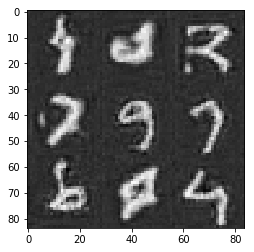

Epoch 1/2... Discriminator Loss: 0.5217... Generator Loss: 2.0209
Epoch 1/2... Discriminator Loss: 3.5935... Generator Loss: 0.0531
Epoch 1/2... Discriminator Loss: 2.5297... Generator Loss: 0.1648
Epoch 1/2... Discriminator Loss: 2.5669... Generator Loss: 0.1312


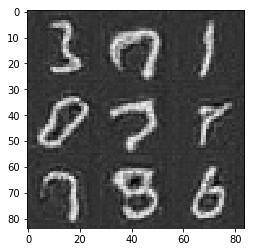

Epoch 1/2... Discriminator Loss: 3.1353... Generator Loss: 0.0823
Epoch 1/2... Discriminator Loss: 0.5299... Generator Loss: 1.9782
Epoch 1/2... Discriminator Loss: 2.2974... Generator Loss: 0.3354
Epoch 1/2... Discriminator Loss: 0.9287... Generator Loss: 0.9101


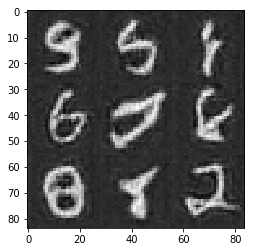

Epoch 1/2... Discriminator Loss: 1.3281... Generator Loss: 0.5501
Epoch 1/2... Discriminator Loss: 2.3857... Generator Loss: 0.1780
Epoch 1/2... Discriminator Loss: 0.4811... Generator Loss: 2.9315
Epoch 1/2... Discriminator Loss: 2.6670... Generator Loss: 0.1129


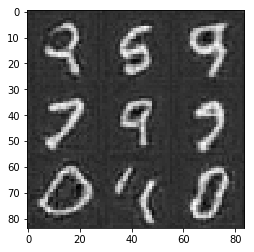

Epoch 1/2... Discriminator Loss: 1.5208... Generator Loss: 0.3953
Epoch 1/2... Discriminator Loss: 0.4981... Generator Loss: 2.5308
Epoch 1/2... Discriminator Loss: 0.3503... Generator Loss: 5.8826
Epoch 1/2... Discriminator Loss: 0.9655... Generator Loss: 0.8776


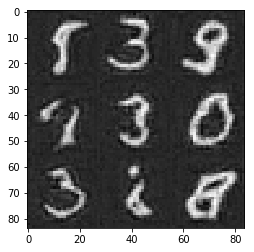

Epoch 1/2... Discriminator Loss: 1.6120... Generator Loss: 0.3758
Epoch 1/2... Discriminator Loss: 4.0812... Generator Loss: 0.0303
Epoch 1/2... Discriminator Loss: 3.0428... Generator Loss: 0.0826
Epoch 1/2... Discriminator Loss: 0.9637... Generator Loss: 0.8444


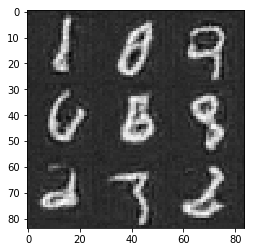

Epoch 1/2... Discriminator Loss: 0.3436... Generator Loss: 6.2951
Epoch 1/2... Discriminator Loss: 0.4664... Generator Loss: 2.3416
Epoch 1/2... Discriminator Loss: 1.5748... Generator Loss: 0.4132
Epoch 1/2... Discriminator Loss: 1.4215... Generator Loss: 0.5386


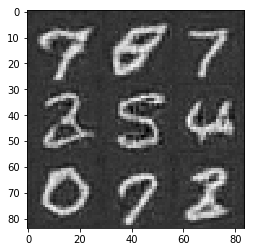

Epoch 1/2... Discriminator Loss: 2.9420... Generator Loss: 0.0871
Epoch 1/2... Discriminator Loss: 3.4171... Generator Loss: 0.0622
Epoch 1/2... Discriminator Loss: 2.2606... Generator Loss: 0.2141
Epoch 1/2... Discriminator Loss: 0.8646... Generator Loss: 1.5035


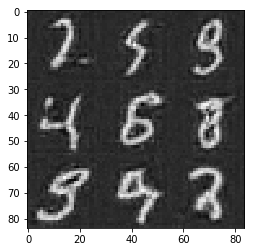

Epoch 1/2... Discriminator Loss: 1.1736... Generator Loss: 0.9184
Epoch 1/2... Discriminator Loss: 1.2485... Generator Loss: 0.6274
Epoch 1/2... Discriminator Loss: 2.4274... Generator Loss: 0.1612
Epoch 1/2... Discriminator Loss: 1.6151... Generator Loss: 0.4700


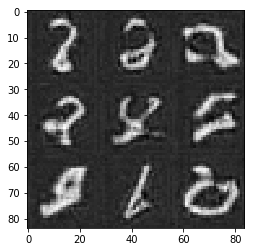

Epoch 1/2... Discriminator Loss: 1.6191... Generator Loss: 0.4054
Epoch 1/2... Discriminator Loss: 1.3663... Generator Loss: 0.4963
Epoch 1/2... Discriminator Loss: 1.2162... Generator Loss: 0.7912
Epoch 1/2... Discriminator Loss: 3.1975... Generator Loss: 0.0882


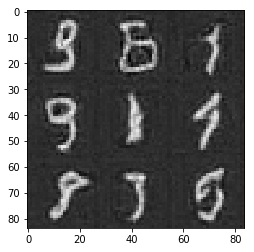

Epoch 1/2... Discriminator Loss: 2.9912... Generator Loss: 0.0872
Epoch 1/2... Discriminator Loss: 2.0986... Generator Loss: 0.2269
Epoch 1/2... Discriminator Loss: 2.4154... Generator Loss: 0.1816
Epoch 1/2... Discriminator Loss: 2.0862... Generator Loss: 0.3167


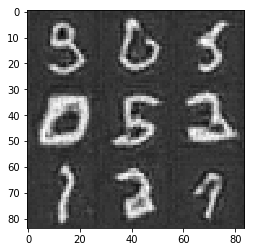

Epoch 1/2... Discriminator Loss: 1.0785... Generator Loss: 0.7842
Epoch 1/2... Discriminator Loss: 2.0838... Generator Loss: 0.2217
Epoch 1/2... Discriminator Loss: 1.3896... Generator Loss: 0.5057
Epoch 1/2... Discriminator Loss: 0.4858... Generator Loss: 2.2539


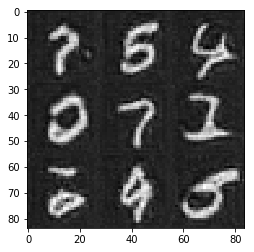

Epoch 1/2... Discriminator Loss: 3.0432... Generator Loss: 0.0809
Epoch 1/2... Discriminator Loss: 1.1376... Generator Loss: 0.7425
Epoch 1/2... Discriminator Loss: 2.2816... Generator Loss: 0.1777
Epoch 1/2... Discriminator Loss: 2.4652... Generator Loss: 0.1514


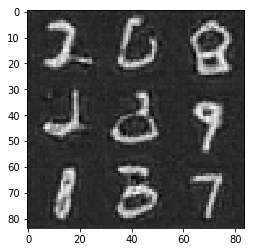

Epoch 1/2... Discriminator Loss: 0.8531... Generator Loss: 0.9377
Epoch 1/2... Discriminator Loss: 2.6219... Generator Loss: 0.1361
Epoch 1/2... Discriminator Loss: 2.5284... Generator Loss: 0.1598
Epoch 1/2... Discriminator Loss: 3.1885... Generator Loss: 0.0720


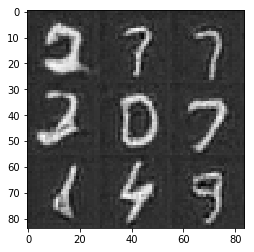

Epoch 1/2... Discriminator Loss: 0.3457... Generator Loss: 5.0354
Epoch 1/2... Discriminator Loss: 0.4461... Generator Loss: 2.5891
Epoch 1/2... Discriminator Loss: 0.3463... Generator Loss: 5.9315
Epoch 1/2... Discriminator Loss: 1.8050... Generator Loss: 0.3142


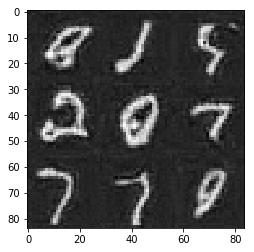

Epoch 1/2... Discriminator Loss: 2.5635... Generator Loss: 0.1426
Epoch 1/2... Discriminator Loss: 1.0385... Generator Loss: 1.0183
Epoch 1/2... Discriminator Loss: 2.0124... Generator Loss: 0.2233
Epoch 1/2... Discriminator Loss: 0.6022... Generator Loss: 1.6056


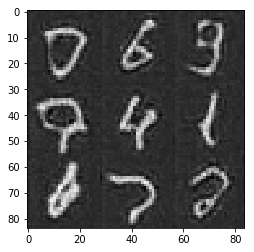

Epoch 1/2... Discriminator Loss: 2.2135... Generator Loss: 0.2069
Epoch 1/2... Discriminator Loss: 2.4557... Generator Loss: 0.1787
Epoch 1/2... Discriminator Loss: 3.3512... Generator Loss: 0.0614
Epoch 1/2... Discriminator Loss: 1.2606... Generator Loss: 0.7245


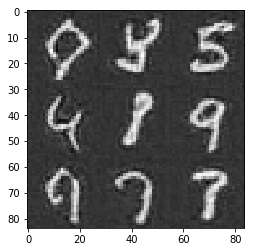

Epoch 1/2... Discriminator Loss: 2.0643... Generator Loss: 0.2339
Epoch 1/2... Discriminator Loss: 1.4062... Generator Loss: 0.5263
Epoch 1/2... Discriminator Loss: 0.5147... Generator Loss: 6.7056
Epoch 1/2... Discriminator Loss: 0.3457... Generator Loss: 6.0961


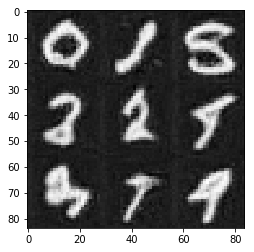

Epoch 1/2... Discriminator Loss: 0.7603... Generator Loss: 1.3562
Epoch 1/2... Discriminator Loss: 2.2135... Generator Loss: 0.2027
Epoch 1/2... Discriminator Loss: 3.0558... Generator Loss: 0.1491
Epoch 1/2... Discriminator Loss: 1.6547... Generator Loss: 0.4204


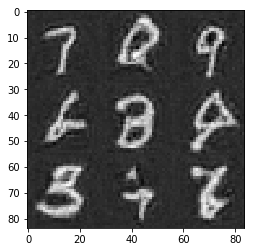

Epoch 1/2... Discriminator Loss: 2.3792... Generator Loss: 0.1713
Epoch 1/2... Discriminator Loss: 0.4197... Generator Loss: 3.2701
Epoch 1/2... Discriminator Loss: 1.4439... Generator Loss: 0.6295
Epoch 1/2... Discriminator Loss: 1.4944... Generator Loss: 0.4727


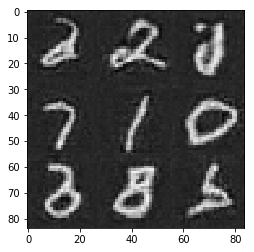

Epoch 1/2... Discriminator Loss: 2.5886... Generator Loss: 0.1428
Epoch 1/2... Discriminator Loss: 2.3449... Generator Loss: 0.1731
Epoch 1/2... Discriminator Loss: 1.7771... Generator Loss: 0.3422
Epoch 1/2... Discriminator Loss: 0.8120... Generator Loss: 1.6003


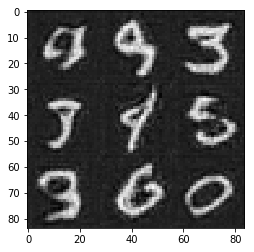

Epoch 1/2... Discriminator Loss: 2.6787... Generator Loss: 0.1159
Epoch 1/2... Discriminator Loss: 2.3403... Generator Loss: 0.1936
Epoch 1/2... Discriminator Loss: 2.5121... Generator Loss: 0.1340
Epoch 1/2... Discriminator Loss: 1.3775... Generator Loss: 0.6147


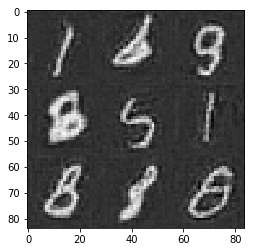

Epoch 1/2... Discriminator Loss: 2.7712... Generator Loss: 0.1030
Epoch 1/2... Discriminator Loss: 1.2941... Generator Loss: 0.8742
Epoch 1/2... Discriminator Loss: 2.3904... Generator Loss: 0.1755
Epoch 1/2... Discriminator Loss: 2.7070... Generator Loss: 0.1165


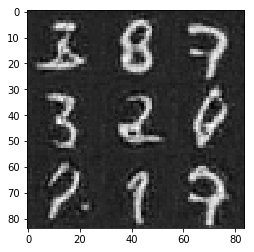

Epoch 1/2... Discriminator Loss: 1.2546... Generator Loss: 0.6180
Epoch 1/2... Discriminator Loss: 2.5984... Generator Loss: 0.1340
Epoch 1/2... Discriminator Loss: 3.0386... Generator Loss: 0.0803
Epoch 1/2... Discriminator Loss: 1.1176... Generator Loss: 0.8022


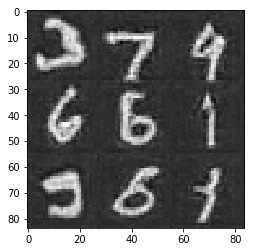

Epoch 1/2... Discriminator Loss: 2.4166... Generator Loss: 0.1628
Epoch 1/2... Discriminator Loss: 2.4923... Generator Loss: 0.1446
Epoch 1/2... Discriminator Loss: 2.2241... Generator Loss: 0.1759
Epoch 1/2... Discriminator Loss: 2.8149... Generator Loss: 0.1045


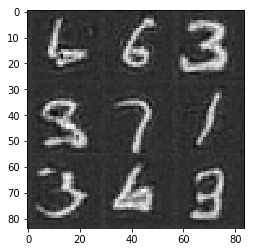

Epoch 1/2... Discriminator Loss: 2.0384... Generator Loss: 0.2584
Epoch 1/2... Discriminator Loss: 3.0867... Generator Loss: 0.0741
Epoch 1/2... Discriminator Loss: 2.3113... Generator Loss: 0.1939
Epoch 2/2... Discriminator Loss: 1.6694... Generator Loss: 0.3368


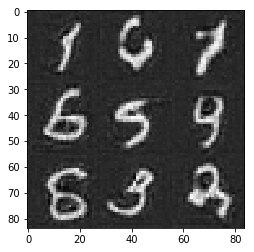

Epoch 2/2... Discriminator Loss: 1.3043... Generator Loss: 0.6348
Epoch 2/2... Discriminator Loss: 2.2457... Generator Loss: 0.2202
Epoch 2/2... Discriminator Loss: 1.7764... Generator Loss: 0.3371
Epoch 2/2... Discriminator Loss: 2.3189... Generator Loss: 0.1644


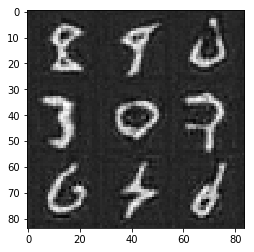

Epoch 2/2... Discriminator Loss: 0.4340... Generator Loss: 2.6649
Epoch 2/2... Discriminator Loss: 0.3625... Generator Loss: 6.7136
Epoch 2/2... Discriminator Loss: 2.3891... Generator Loss: 0.2490
Epoch 2/2... Discriminator Loss: 2.2809... Generator Loss: 0.2032


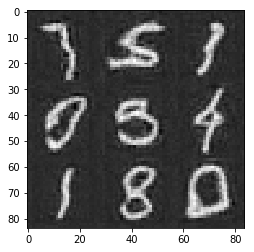

Epoch 2/2... Discriminator Loss: 1.3517... Generator Loss: 0.5943
Epoch 2/2... Discriminator Loss: 3.2254... Generator Loss: 0.0682
Epoch 2/2... Discriminator Loss: 1.4540... Generator Loss: 0.5195
Epoch 2/2... Discriminator Loss: 1.3080... Generator Loss: 0.6652


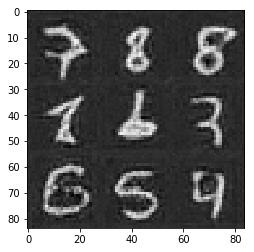

Epoch 2/2... Discriminator Loss: 1.2316... Generator Loss: 0.6556
Epoch 2/2... Discriminator Loss: 1.9549... Generator Loss: 0.2506
Epoch 2/2... Discriminator Loss: 0.6646... Generator Loss: 1.4658
Epoch 2/2... Discriminator Loss: 3.0504... Generator Loss: 0.0819


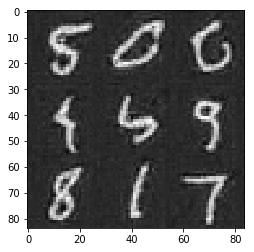

Epoch 2/2... Discriminator Loss: 2.3492... Generator Loss: 0.1666
Epoch 2/2... Discriminator Loss: 1.5289... Generator Loss: 0.4290
Epoch 2/2... Discriminator Loss: 2.5132... Generator Loss: 0.1446
Epoch 2/2... Discriminator Loss: 1.6146... Generator Loss: 0.3574


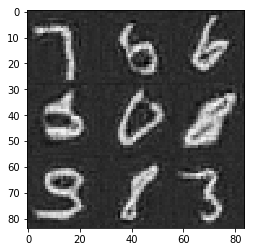

Epoch 2/2... Discriminator Loss: 0.4207... Generator Loss: 2.7720
Epoch 2/2... Discriminator Loss: 2.3794... Generator Loss: 0.1774
Epoch 2/2... Discriminator Loss: 0.3464... Generator Loss: 5.2718
Epoch 2/2... Discriminator Loss: 2.6033... Generator Loss: 0.1352


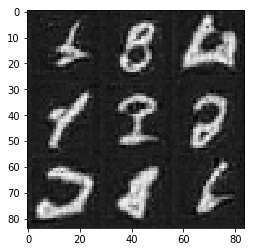

Epoch 2/2... Discriminator Loss: 2.8070... Generator Loss: 0.1318
Epoch 2/2... Discriminator Loss: 2.2351... Generator Loss: 0.2133
Epoch 2/2... Discriminator Loss: 3.1302... Generator Loss: 0.0713
Epoch 2/2... Discriminator Loss: 2.1447... Generator Loss: 0.2016


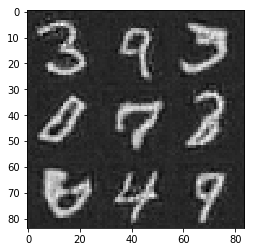

Epoch 2/2... Discriminator Loss: 1.7819... Generator Loss: 0.3270
Epoch 2/2... Discriminator Loss: 1.8685... Generator Loss: 0.2846
Epoch 2/2... Discriminator Loss: 1.3728... Generator Loss: 0.4913
Epoch 2/2... Discriminator Loss: 2.5389... Generator Loss: 0.1427


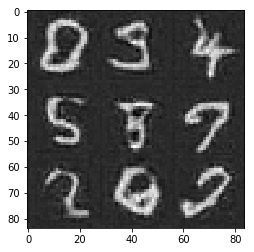

Epoch 2/2... Discriminator Loss: 2.6951... Generator Loss: 0.1206
Epoch 2/2... Discriminator Loss: 2.8543... Generator Loss: 0.1838
Epoch 2/2... Discriminator Loss: 1.9432... Generator Loss: 0.3244
Epoch 2/2... Discriminator Loss: 3.2833... Generator Loss: 0.0635


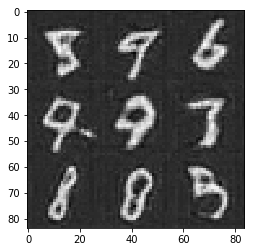

Epoch 2/2... Discriminator Loss: 1.1081... Generator Loss: 0.7082
Epoch 2/2... Discriminator Loss: 0.6136... Generator Loss: 2.1131
Epoch 2/2... Discriminator Loss: 1.7267... Generator Loss: 2.1823
Epoch 2/2... Discriminator Loss: 2.5655... Generator Loss: 0.1287


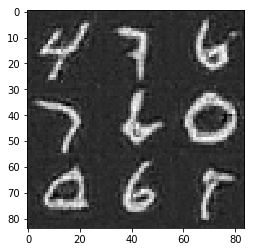

Epoch 2/2... Discriminator Loss: 2.9206... Generator Loss: 0.0998
Epoch 2/2... Discriminator Loss: 2.9981... Generator Loss: 0.0881
Epoch 2/2... Discriminator Loss: 3.3862... Generator Loss: 0.0631
Epoch 2/2... Discriminator Loss: 1.7847... Generator Loss: 0.2937


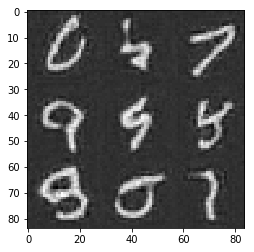

Epoch 2/2... Discriminator Loss: 1.2589... Generator Loss: 0.5338
Epoch 2/2... Discriminator Loss: 2.3488... Generator Loss: 0.1827
Epoch 2/2... Discriminator Loss: 2.6920... Generator Loss: 0.1186
Epoch 2/2... Discriminator Loss: 1.8051... Generator Loss: 0.5669


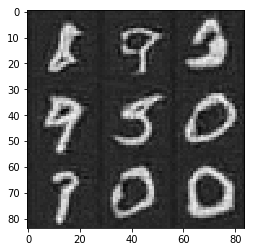

Epoch 2/2... Discriminator Loss: 2.5677... Generator Loss: 0.1238
Epoch 2/2... Discriminator Loss: 2.2611... Generator Loss: 0.1707
Epoch 2/2... Discriminator Loss: 2.6401... Generator Loss: 0.1161
Epoch 2/2... Discriminator Loss: 2.5152... Generator Loss: 0.1546


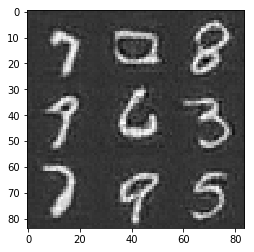

Epoch 2/2... Discriminator Loss: 2.7060... Generator Loss: 0.1089
Epoch 2/2... Discriminator Loss: 3.0775... Generator Loss: 0.0781
Epoch 2/2... Discriminator Loss: 0.7482... Generator Loss: 1.3110
Epoch 2/2... Discriminator Loss: 0.8972... Generator Loss: 0.9947


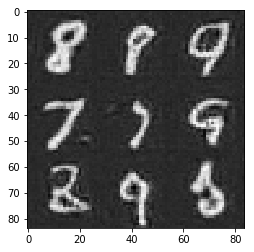

Epoch 2/2... Discriminator Loss: 0.8147... Generator Loss: 1.0911
Epoch 2/2... Discriminator Loss: 0.9590... Generator Loss: 0.8314
Epoch 2/2... Discriminator Loss: 1.7165... Generator Loss: 0.3337
Epoch 2/2... Discriminator Loss: 2.6197... Generator Loss: 0.1529


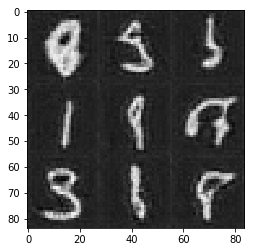

Epoch 2/2... Discriminator Loss: 2.4188... Generator Loss: 0.1552
Epoch 2/2... Discriminator Loss: 0.5499... Generator Loss: 4.6637
Epoch 2/2... Discriminator Loss: 1.8503... Generator Loss: 0.2965
Epoch 2/2... Discriminator Loss: 2.5215... Generator Loss: 0.1505


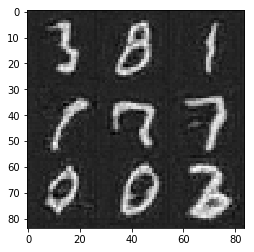

Epoch 2/2... Discriminator Loss: 3.0976... Generator Loss: 0.0782
Epoch 2/2... Discriminator Loss: 1.1372... Generator Loss: 1.3422
Epoch 2/2... Discriminator Loss: 0.8852... Generator Loss: 0.9718
Epoch 2/2... Discriminator Loss: 0.3599... Generator Loss: 5.6336


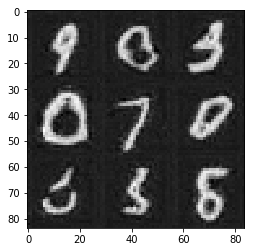

Epoch 2/2... Discriminator Loss: 2.6171... Generator Loss: 0.1225
Epoch 2/2... Discriminator Loss: 1.5552... Generator Loss: 0.4724
Epoch 2/2... Discriminator Loss: 2.9340... Generator Loss: 0.0912
Epoch 2/2... Discriminator Loss: 1.9850... Generator Loss: 0.2521


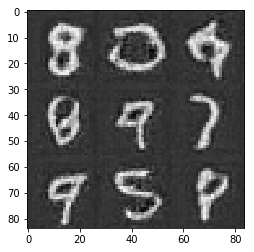

Epoch 2/2... Discriminator Loss: 2.4260... Generator Loss: 0.1687
Epoch 2/2... Discriminator Loss: 1.8431... Generator Loss: 0.3644
Epoch 2/2... Discriminator Loss: 2.7884... Generator Loss: 0.1212
Epoch 2/2... Discriminator Loss: 0.9183... Generator Loss: 1.3018


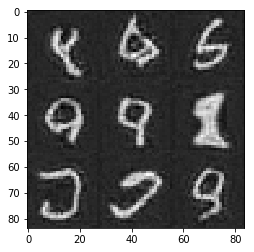

Epoch 2/2... Discriminator Loss: 2.0699... Generator Loss: 0.2155
Epoch 2/2... Discriminator Loss: 2.6138... Generator Loss: 0.1461
Epoch 2/2... Discriminator Loss: 2.0735... Generator Loss: 0.2242
Epoch 2/2... Discriminator Loss: 2.1989... Generator Loss: 0.1971


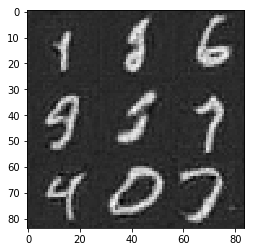

Epoch 2/2... Discriminator Loss: 1.5783... Generator Loss: 0.7993
Epoch 2/2... Discriminator Loss: 1.4009... Generator Loss: 0.5267
Epoch 2/2... Discriminator Loss: 2.3622... Generator Loss: 0.1586
Epoch 2/2... Discriminator Loss: 1.1967... Generator Loss: 0.6979


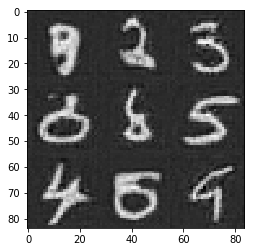

Epoch 2/2... Discriminator Loss: 2.2075... Generator Loss: 0.2067
Epoch 2/2... Discriminator Loss: 2.5159... Generator Loss: 0.1353
Epoch 2/2... Discriminator Loss: 2.6768... Generator Loss: 0.1255
Epoch 2/2... Discriminator Loss: 0.9697... Generator Loss: 0.8415


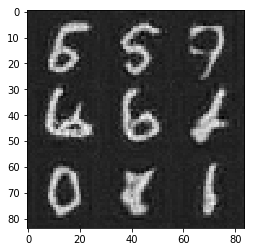

Epoch 2/2... Discriminator Loss: 1.4476... Generator Loss: 0.4821
Epoch 2/2... Discriminator Loss: 1.4713... Generator Loss: 0.5077
Epoch 2/2... Discriminator Loss: 1.6821... Generator Loss: 0.3697
Epoch 2/2... Discriminator Loss: 0.3893... Generator Loss: 3.3659


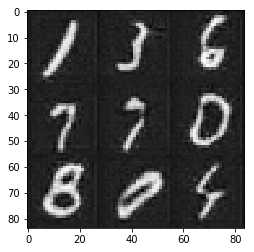

Epoch 2/2... Discriminator Loss: 3.3425... Generator Loss: 0.0564
Epoch 2/2... Discriminator Loss: 2.6075... Generator Loss: 0.1262
Epoch 2/2... Discriminator Loss: 3.2281... Generator Loss: 0.0646
Epoch 2/2... Discriminator Loss: 1.7789... Generator Loss: 0.3194


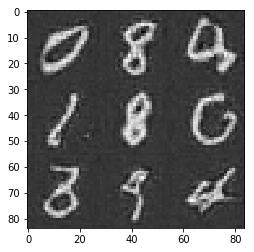

Epoch 2/2... Discriminator Loss: 3.0795... Generator Loss: 0.0759
Epoch 2/2... Discriminator Loss: 3.8916... Generator Loss: 0.0418
Epoch 2/2... Discriminator Loss: 2.9753... Generator Loss: 0.0924
Epoch 2/2... Discriminator Loss: 0.9535... Generator Loss: 1.5387


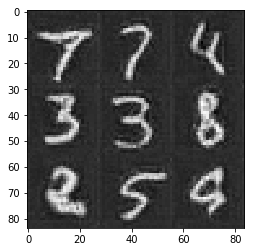

Epoch 2/2... Discriminator Loss: 1.2208... Generator Loss: 0.6420
Epoch 2/2... Discriminator Loss: 1.5140... Generator Loss: 0.4267
Epoch 2/2... Discriminator Loss: 1.3729... Generator Loss: 0.5893
Epoch 2/2... Discriminator Loss: 2.0035... Generator Loss: 0.2737


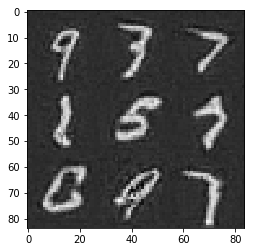

Epoch 2/2... Discriminator Loss: 2.5038... Generator Loss: 0.1463
Epoch 2/2... Discriminator Loss: 1.1468... Generator Loss: 0.7557
Epoch 2/2... Discriminator Loss: 1.0747... Generator Loss: 0.7437
Epoch 2/2... Discriminator Loss: 1.4694... Generator Loss: 0.5352


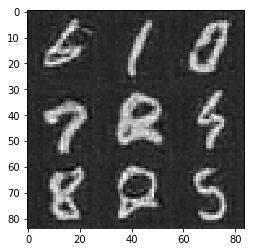

Epoch 2/2... Discriminator Loss: 1.7273... Generator Loss: 0.3387
Epoch 2/2... Discriminator Loss: 1.4270... Generator Loss: 0.4537
Epoch 2/2... Discriminator Loss: 2.6169... Generator Loss: 0.1210
Epoch 2/2... Discriminator Loss: 2.2724... Generator Loss: 0.1757


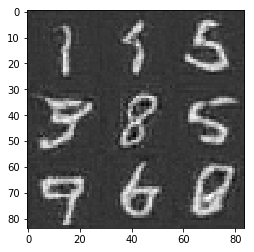

Epoch 2/2... Discriminator Loss: 1.5102... Generator Loss: 0.5163
Epoch 2/2... Discriminator Loss: 2.7230... Generator Loss: 0.1530
Epoch 2/2... Discriminator Loss: 0.4349... Generator Loss: 2.4331
Epoch 2/2... Discriminator Loss: 2.9572... Generator Loss: 0.0861


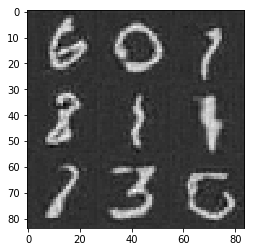

Epoch 2/2... Discriminator Loss: 0.5506... Generator Loss: 1.7057
Epoch 2/2... Discriminator Loss: 3.2010... Generator Loss: 0.0672
Epoch 2/2... Discriminator Loss: 1.2669... Generator Loss: 0.5735
Epoch 2/2... Discriminator Loss: 2.4683... Generator Loss: 0.1569


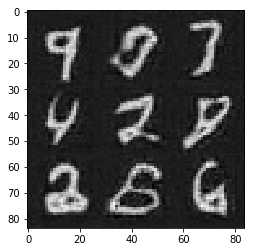

Epoch 2/2... Discriminator Loss: 1.9448... Generator Loss: 0.3417
Epoch 2/2... Discriminator Loss: 0.9269... Generator Loss: 0.9109
Epoch 2/2... Discriminator Loss: 3.0101... Generator Loss: 0.0827
Epoch 2/2... Discriminator Loss: 2.1041... Generator Loss: 0.2820


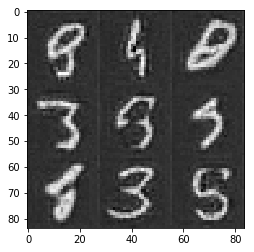

Epoch 2/2... Discriminator Loss: 1.8910... Generator Loss: 0.2601
Epoch 2/2... Discriminator Loss: 1.0291... Generator Loss: 0.7694
Epoch 2/2... Discriminator Loss: 2.5706... Generator Loss: 0.1211
Epoch 2/2... Discriminator Loss: 1.8847... Generator Loss: 0.2637


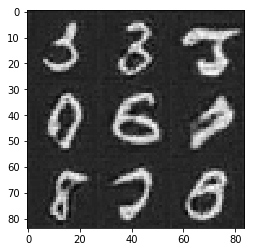

Epoch 2/2... Discriminator Loss: 0.4038... Generator Loss: 3.8407
Epoch 2/2... Discriminator Loss: 0.7519... Generator Loss: 1.2681
Epoch 2/2... Discriminator Loss: 0.5346... Generator Loss: 2.1530
Epoch 2/2... Discriminator Loss: 1.5086... Generator Loss: 0.6934


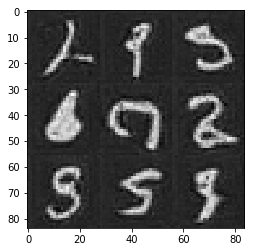

Epoch 2/2... Discriminator Loss: 1.8471... Generator Loss: 0.3175
Epoch 2/2... Discriminator Loss: 2.1200... Generator Loss: 0.2323
Epoch 2/2... Discriminator Loss: 1.6385... Generator Loss: 0.4120
Epoch 2/2... Discriminator Loss: 1.5206... Generator Loss: 0.4832


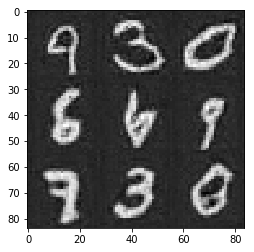

Epoch 2/2... Discriminator Loss: 3.0904... Generator Loss: 0.0953
Epoch 2/2... Discriminator Loss: 2.3030... Generator Loss: 0.1974
Epoch 2/2... Discriminator Loss: 1.6104... Generator Loss: 0.3672
Epoch 2/2... Discriminator Loss: 0.3556... Generator Loss: 4.7693


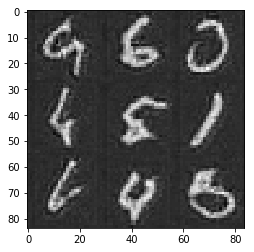

Epoch 2/2... Discriminator Loss: 2.5578... Generator Loss: 0.1320
Epoch 2/2... Discriminator Loss: 0.8848... Generator Loss: 1.0227
Epoch 2/2... Discriminator Loss: 1.0916... Generator Loss: 0.7598
Epoch 2/2... Discriminator Loss: 1.8231... Generator Loss: 0.3235


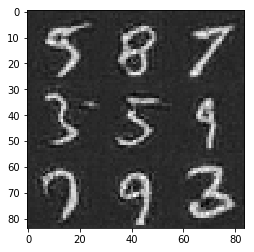

Epoch 2/2... Discriminator Loss: 1.5923... Generator Loss: 0.4292
Epoch 2/2... Discriminator Loss: 2.2611... Generator Loss: 0.1887
Epoch 2/2... Discriminator Loss: 0.3588... Generator Loss: 4.0209
Epoch 2/2... Discriminator Loss: 2.8788... Generator Loss: 0.1002


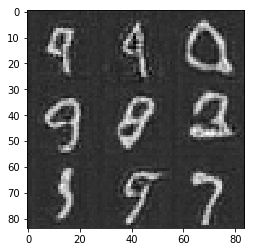

Epoch 2/2... Discriminator Loss: 1.2985... Generator Loss: 0.6441
Epoch 2/2... Discriminator Loss: 1.8838... Generator Loss: 0.2725
Epoch 2/2... Discriminator Loss: 2.2158... Generator Loss: 0.2193
Epoch 2/2... Discriminator Loss: 2.6852... Generator Loss: 0.1233


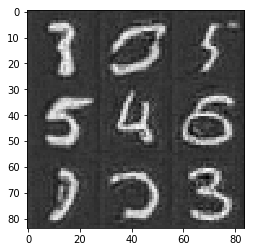

Epoch 2/2... Discriminator Loss: 1.8984... Generator Loss: 0.3330
Epoch 2/2... Discriminator Loss: 2.8480... Generator Loss: 0.1048
Epoch 2/2... Discriminator Loss: 1.4161... Generator Loss: 0.4894
Epoch 2/2... Discriminator Loss: 3.0126... Generator Loss: 0.0800


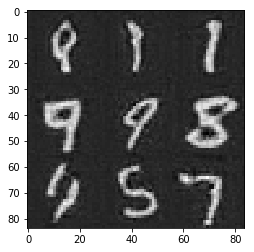

Epoch 2/2... Discriminator Loss: 2.1254... Generator Loss: 0.3068
Epoch 2/2... Discriminator Loss: 2.8898... Generator Loss: 0.0895
Epoch 2/2... Discriminator Loss: 2.8295... Generator Loss: 0.1211
Epoch 2/2... Discriminator Loss: 2.6825... Generator Loss: 0.1373


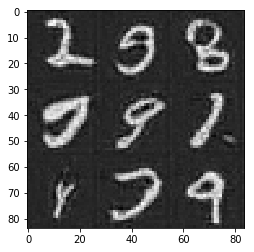

Epoch 2/2... Discriminator Loss: 1.8885... Generator Loss: 0.2984
Epoch 2/2... Discriminator Loss: 1.7985... Generator Loss: 0.3007
Epoch 2/2... Discriminator Loss: 1.4630... Generator Loss: 0.4759
Epoch 2/2... Discriminator Loss: 2.8402... Generator Loss: 0.0965


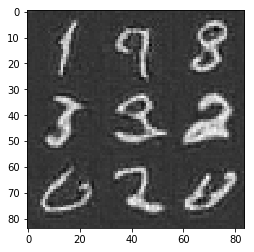

Epoch 2/2... Discriminator Loss: 2.8340... Generator Loss: 0.1001
Epoch 2/2... Discriminator Loss: 0.4202... Generator Loss: 3.9505
Epoch 2/2... Discriminator Loss: 2.0600... Generator Loss: 0.2246
Epoch 2/2... Discriminator Loss: 2.8407... Generator Loss: 0.1073


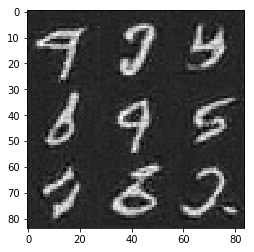

Epoch 2/2... Discriminator Loss: 3.0736... Generator Loss: 0.0962
Epoch 2/2... Discriminator Loss: 3.4053... Generator Loss: 0.0593
Epoch 2/2... Discriminator Loss: 1.9347... Generator Loss: 0.2710
Epoch 2/2... Discriminator Loss: 1.9075... Generator Loss: 0.3097


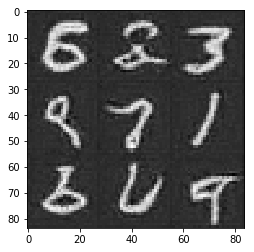

Epoch 2/2... Discriminator Loss: 2.6832... Generator Loss: 0.1374
Epoch 2/2... Discriminator Loss: 0.3790... Generator Loss: 5.5503
Epoch 2/2... Discriminator Loss: 2.8996... Generator Loss: 0.1014
Epoch 2/2... Discriminator Loss: 3.2118... Generator Loss: 0.0799


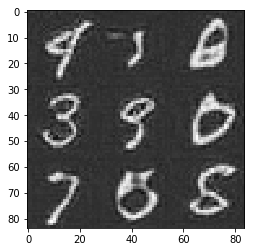

Epoch 2/2... Discriminator Loss: 4.2883... Generator Loss: 0.0319
Epoch 2/2... Discriminator Loss: 2.3306... Generator Loss: 0.1784
Epoch 2/2... Discriminator Loss: 1.8287... Generator Loss: 0.3172
Epoch 2/2... Discriminator Loss: 2.1919... Generator Loss: 0.2222


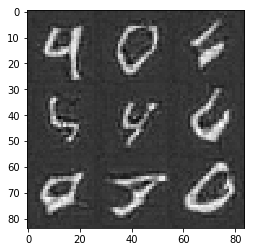

Epoch 2/2... Discriminator Loss: 2.3360... Generator Loss: 0.1881
Epoch 2/2... Discriminator Loss: 1.5882... Generator Loss: 0.4241
Epoch 2/2... Discriminator Loss: 2.1766... Generator Loss: 0.1935
Epoch 2/2... Discriminator Loss: 0.9800... Generator Loss: 0.9045


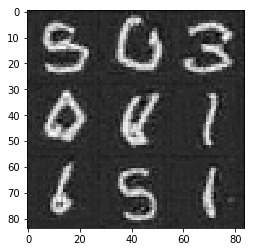

Epoch 2/2... Discriminator Loss: 2.1896... Generator Loss: 0.1954
Epoch 2/2... Discriminator Loss: 0.6249... Generator Loss: 2.0549
Epoch 2/2... Discriminator Loss: 0.9743... Generator Loss: 0.8622
Epoch 2/2... Discriminator Loss: 2.2601... Generator Loss: 0.1810


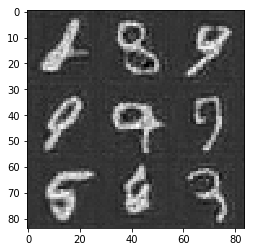

Epoch 2/2... Discriminator Loss: 0.9010... Generator Loss: 1.0496
Epoch 2/2... Discriminator Loss: 0.9836... Generator Loss: 1.0271
Epoch 2/2... Discriminator Loss: 1.2914... Generator Loss: 0.5890
Epoch 2/2... Discriminator Loss: 1.6623... Generator Loss: 0.3574


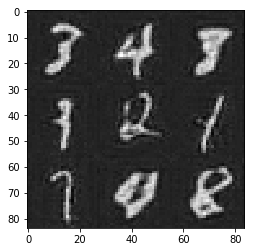

Epoch 2/2... Discriminator Loss: 1.9607... Generator Loss: 0.2816
Epoch 2/2... Discriminator Loss: 2.6127... Generator Loss: 0.1260
Epoch 2/2... Discriminator Loss: 2.7640... Generator Loss: 0.1265
Epoch 2/2... Discriminator Loss: 2.7512... Generator Loss: 0.1109


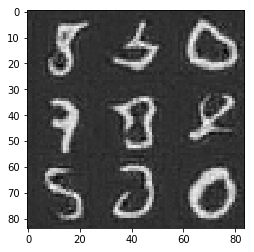

Epoch 2/2... Discriminator Loss: 1.5039... Generator Loss: 0.4366
Epoch 2/2... Discriminator Loss: 2.3221... Generator Loss: 0.1908
Epoch 2/2... Discriminator Loss: 2.1791... Generator Loss: 0.2134
Epoch 2/2... Discriminator Loss: 2.7521... Generator Loss: 0.0997


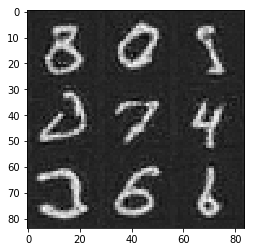

Epoch 2/2... Discriminator Loss: 2.1719... Generator Loss: 0.2339
Epoch 2/2... Discriminator Loss: 2.4037... Generator Loss: 0.1791
Epoch 2/2... Discriminator Loss: 2.1069... Generator Loss: 0.2858
Epoch 2/2... Discriminator Loss: 2.7471... Generator Loss: 0.1077


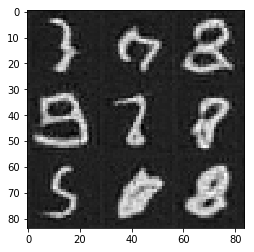

Epoch 2/2... Discriminator Loss: 0.6384... Generator Loss: 1.6613
Epoch 2/2... Discriminator Loss: 1.2114... Generator Loss: 0.6810
Epoch 2/2... Discriminator Loss: 0.3922... Generator Loss: 6.0812
Epoch 2/2... Discriminator Loss: 3.5160... Generator Loss: 0.0499


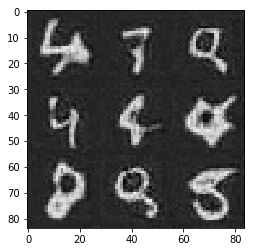

Epoch 2/2... Discriminator Loss: 2.2941... Generator Loss: 0.1911
Epoch 2/2... Discriminator Loss: 2.0176... Generator Loss: 0.2433
Epoch 2/2... Discriminator Loss: 3.0059... Generator Loss: 0.0863
Epoch 2/2... Discriminator Loss: 1.6527... Generator Loss: 0.3943


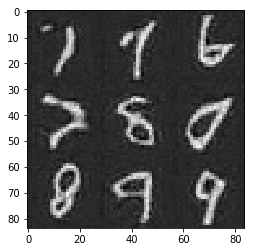

Epoch 2/2... Discriminator Loss: 3.1418... Generator Loss: 0.0714
Epoch 2/2... Discriminator Loss: 0.7930... Generator Loss: 1.1807
Epoch 2/2... Discriminator Loss: 2.7400... Generator Loss: 0.1081
Epoch 2/2... Discriminator Loss: 0.7432... Generator Loss: 3.5696


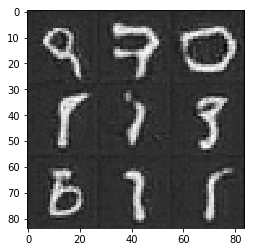

Epoch 2/2... Discriminator Loss: 2.0426... Generator Loss: 0.2768
Epoch 2/2... Discriminator Loss: 1.2557... Generator Loss: 0.5945
Epoch 2/2... Discriminator Loss: 2.4928... Generator Loss: 0.1510
Epoch 2/2... Discriminator Loss: 3.5524... Generator Loss: 0.0717


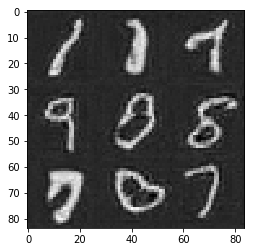

Epoch 2/2... Discriminator Loss: 2.2647... Generator Loss: 0.1945
Epoch 2/2... Discriminator Loss: 2.2662... Generator Loss: 0.1931
Epoch 2/2... Discriminator Loss: 1.5240... Generator Loss: 0.4130
Epoch 2/2... Discriminator Loss: 3.8834... Generator Loss: 0.0406


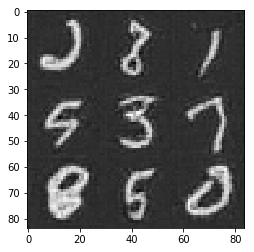

Epoch 2/2... Discriminator Loss: 0.8406... Generator Loss: 1.1307
Epoch 2/2... Discriminator Loss: 3.1084... Generator Loss: 0.0781
Epoch 2/2... Discriminator Loss: 3.0588... Generator Loss: 0.0786
Epoch 2/2... Discriminator Loss: 2.0719... Generator Loss: 0.2768


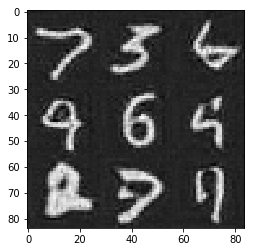

Epoch 2/2... Discriminator Loss: 2.4171... Generator Loss: 0.1598
Epoch 2/2... Discriminator Loss: 1.8793... Generator Loss: 0.2949
Epoch 2/2... Discriminator Loss: 3.0091... Generator Loss: 0.0856
Epoch 2/2... Discriminator Loss: 2.1225... Generator Loss: 0.2174


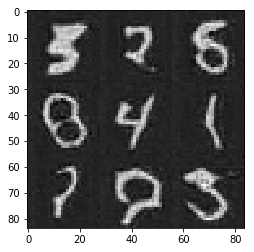

Epoch 2/2... Discriminator Loss: 1.3002... Generator Loss: 0.6369
Epoch 2/2... Discriminator Loss: 1.7766... Generator Loss: 0.3115
Epoch 2/2... Discriminator Loss: 2.2646... Generator Loss: 0.2015
Epoch 2/2... Discriminator Loss: 2.9361... Generator Loss: 0.0821


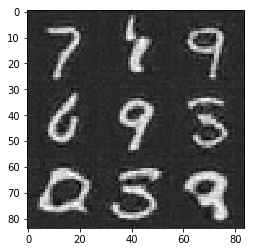

Epoch 2/2... Discriminator Loss: 1.8562... Generator Loss: 0.2680
Epoch 2/2... Discriminator Loss: 0.4915... Generator Loss: 2.0617
Epoch 2/2... Discriminator Loss: 2.6563... Generator Loss: 0.1467
Epoch 2/2... Discriminator Loss: 2.2215... Generator Loss: 0.1932


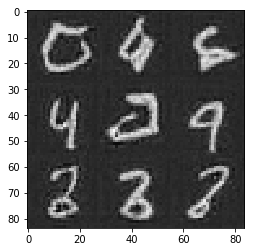

Epoch 2/2... Discriminator Loss: 3.2905... Generator Loss: 0.0688
Epoch 2/2... Discriminator Loss: 3.1502... Generator Loss: 0.0955
Epoch 2/2... Discriminator Loss: 2.3829... Generator Loss: 0.1589
Epoch 2/2... Discriminator Loss: 1.7998... Generator Loss: 0.3147


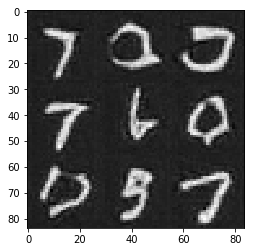

Epoch 2/2... Discriminator Loss: 2.5660... Generator Loss: 0.1314
Epoch 2/2... Discriminator Loss: 2.6531... Generator Loss: 0.1294
Epoch 2/2... Discriminator Loss: 2.6563... Generator Loss: 0.1222
Epoch 2/2... Discriminator Loss: 2.1086... Generator Loss: 0.2209


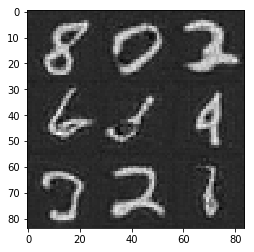

Epoch 2/2... Discriminator Loss: 1.8462... Generator Loss: 0.2759
Epoch 2/2... Discriminator Loss: 2.0931... Generator Loss: 0.2180
Epoch 2/2... Discriminator Loss: 3.1505... Generator Loss: 0.0707
Epoch 2/2... Discriminator Loss: 3.3311... Generator Loss: 0.0686


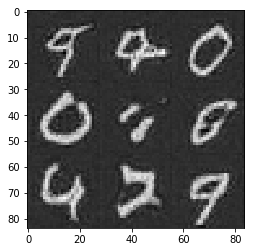

Epoch 2/2... Discriminator Loss: 3.5902... Generator Loss: 0.0431
Epoch 2/2... Discriminator Loss: 2.4597... Generator Loss: 0.1745
Epoch 2/2... Discriminator Loss: 2.2870... Generator Loss: 0.2302
Epoch 2/2... Discriminator Loss: 2.6928... Generator Loss: 0.1116


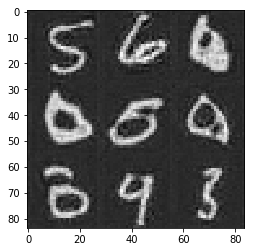

Epoch 2/2... Discriminator Loss: 2.8631... Generator Loss: 0.0932
Epoch 2/2... Discriminator Loss: 2.4772... Generator Loss: 0.1899
Epoch 2/2... Discriminator Loss: 2.6670... Generator Loss: 0.1265
Epoch 2/2... Discriminator Loss: 1.5805... Generator Loss: 0.4473


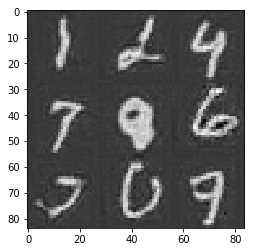

Epoch 2/2... Discriminator Loss: 1.4753... Generator Loss: 0.4334
Epoch 2/2... Discriminator Loss: 2.0632... Generator Loss: 0.4088
Epoch 2/2... Discriminator Loss: 1.8073... Generator Loss: 0.4125
Epoch 2/2... Discriminator Loss: 1.4382... Generator Loss: 0.4807


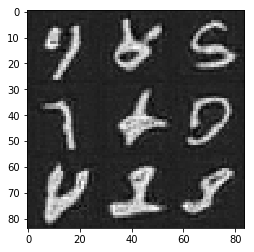

Epoch 2/2... Discriminator Loss: 0.3718... Generator Loss: 3.6424
Epoch 2/2... Discriminator Loss: 2.0761... Generator Loss: 1.0269
Epoch 2/2... Discriminator Loss: 2.4670... Generator Loss: 0.1379
Epoch 2/2... Discriminator Loss: 2.1382... Generator Loss: 0.2499


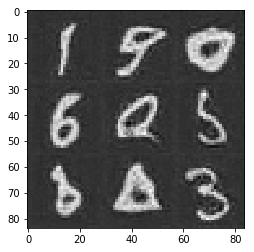

Epoch 2/2... Discriminator Loss: 2.0385... Generator Loss: 0.2270
Epoch 2/2... Discriminator Loss: 2.6608... Generator Loss: 0.1170
Epoch 2/2... Discriminator Loss: 3.1899... Generator Loss: 0.0836
Epoch 2/2... Discriminator Loss: 2.2389... Generator Loss: 0.2056


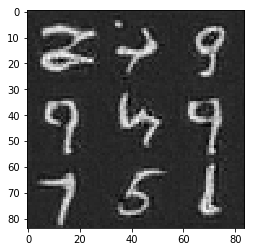

Epoch 2/2... Discriminator Loss: 3.1831... Generator Loss: 0.0654
Epoch 2/2... Discriminator Loss: 2.4536... Generator Loss: 0.1460
Epoch 2/2... Discriminator Loss: 2.3607... Generator Loss: 0.1669
Epoch 2/2... Discriminator Loss: 2.8009... Generator Loss: 0.1216


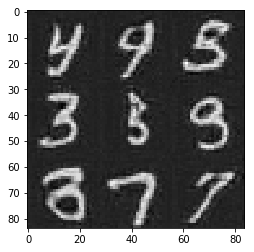

Epoch 2/2... Discriminator Loss: 3.5097... Generator Loss: 0.0513
Epoch 2/2... Discriminator Loss: 3.0638... Generator Loss: 0.0736
Epoch 2/2... Discriminator Loss: 2.6475... Generator Loss: 0.1707
Epoch 2/2... Discriminator Loss: 2.1807... Generator Loss: 0.2274


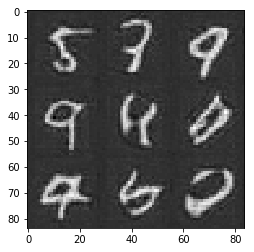

Epoch 2/2... Discriminator Loss: 1.8511... Generator Loss: 0.2835
Epoch 2/2... Discriminator Loss: 2.4660... Generator Loss: 0.1498
Epoch 2/2... Discriminator Loss: 2.0440... Generator Loss: 0.2216
Epoch 2/2... Discriminator Loss: 2.6757... Generator Loss: 0.1261


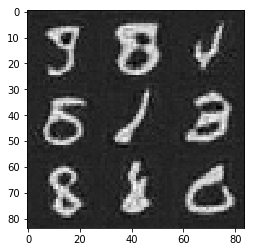

Epoch 2/2... Discriminator Loss: 0.9967... Generator Loss: 0.8908
Epoch 2/2... Discriminator Loss: 1.4870... Generator Loss: 0.4260
Epoch 2/2... Discriminator Loss: 2.8344... Generator Loss: 0.0975
Epoch 2/2... Discriminator Loss: 1.7729... Generator Loss: 0.3443


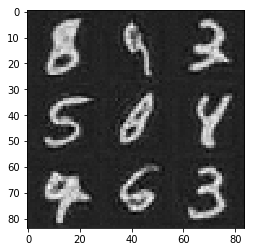

Epoch 2/2... Discriminator Loss: 1.9744... Generator Loss: 0.2728
Epoch 2/2... Discriminator Loss: 0.7327... Generator Loss: 1.2982
Epoch 2/2... Discriminator Loss: 2.0724... Generator Loss: 0.2791
Epoch 2/2... Discriminator Loss: 2.7960... Generator Loss: 0.1430


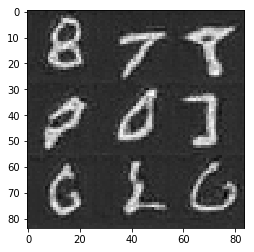

Epoch 2/2... Discriminator Loss: 1.6671... Generator Loss: 0.6363
Epoch 2/2... Discriminator Loss: 1.4976... Generator Loss: 0.4476
Epoch 2/2... Discriminator Loss: 1.8919... Generator Loss: 0.2623
Epoch 2/2... Discriminator Loss: 1.6523... Generator Loss: 0.3616


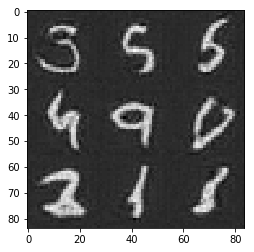

Epoch 2/2... Discriminator Loss: 3.0478... Generator Loss: 0.0850
Epoch 2/2... Discriminator Loss: 2.3825... Generator Loss: 0.1478
Epoch 2/2... Discriminator Loss: 0.7651... Generator Loss: 4.1639
Epoch 2/2... Discriminator Loss: 1.1076... Generator Loss: 1.1484


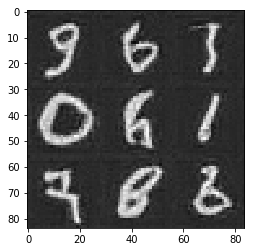

Epoch 2/2... Discriminator Loss: 1.6211... Generator Loss: 0.3739
Epoch 2/2... Discriminator Loss: 1.2675... Generator Loss: 0.5992
Epoch 2/2... Discriminator Loss: 2.5597... Generator Loss: 0.1286
Epoch 2/2... Discriminator Loss: 1.6643... Generator Loss: 0.3506


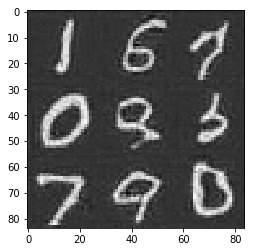

Epoch 2/2... Discriminator Loss: 2.0255... Generator Loss: 0.2366
Epoch 2/2... Discriminator Loss: 2.8346... Generator Loss: 0.1055
Epoch 2/2... Discriminator Loss: 2.9753... Generator Loss: 0.0793
Epoch 2/2... Discriminator Loss: 1.9961... Generator Loss: 0.2783


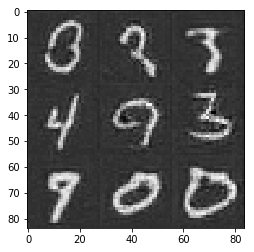

Epoch 2/2... Discriminator Loss: 2.7574... Generator Loss: 0.1079
Epoch 2/2... Discriminator Loss: 3.3070... Generator Loss: 0.0692
Epoch 2/2... Discriminator Loss: 2.1171... Generator Loss: 0.2065
Epoch 2/2... Discriminator Loss: 2.4334... Generator Loss: 0.1456


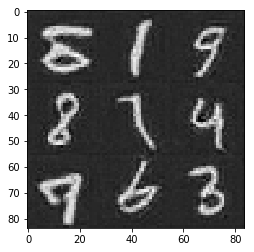

Epoch 2/2... Discriminator Loss: 3.1217... Generator Loss: 0.0816
Epoch 2/2... Discriminator Loss: 2.9823... Generator Loss: 0.0921
Epoch 2/2... Discriminator Loss: 1.3160... Generator Loss: 0.6850
Epoch 2/2... Discriminator Loss: 2.1617... Generator Loss: 0.1944


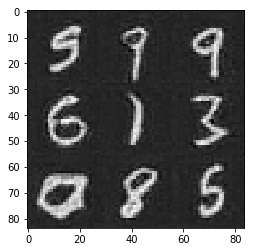

Epoch 2/2... Discriminator Loss: 1.2721... Generator Loss: 0.5458
Epoch 2/2... Discriminator Loss: 2.4741... Generator Loss: 0.1697
Epoch 2/2... Discriminator Loss: 2.8848... Generator Loss: 0.1138
Epoch 2/2... Discriminator Loss: 3.0692... Generator Loss: 0.0775


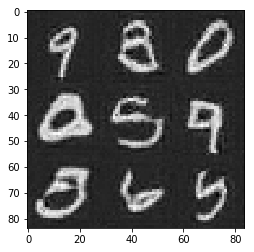

Epoch 2/2... Discriminator Loss: 1.8540... Generator Loss: 0.2811
Epoch 2/2... Discriminator Loss: 2.3600... Generator Loss: 0.2100
Epoch 2/2... Discriminator Loss: 2.7326... Generator Loss: 0.1111
Epoch 2/2... Discriminator Loss: 2.9373... Generator Loss: 0.1007


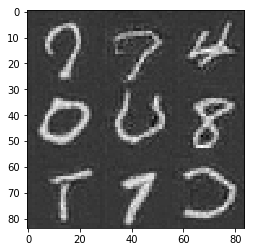

Epoch 2/2... Discriminator Loss: 2.2144... Generator Loss: 0.2031
Epoch 2/2... Discriminator Loss: 3.0438... Generator Loss: 0.0821
Epoch 2/2... Discriminator Loss: 2.4166... Generator Loss: 0.1592
Epoch 2/2... Discriminator Loss: 3.0962... Generator Loss: 0.0827


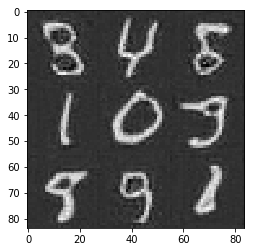

Epoch 2/2... Discriminator Loss: 2.7695... Generator Loss: 0.1177
Epoch 2/2... Discriminator Loss: 2.0718... Generator Loss: 0.2396
Epoch 2/2... Discriminator Loss: 3.4211... Generator Loss: 0.0791
Epoch 2/2... Discriminator Loss: 1.8111... Generator Loss: 0.3341


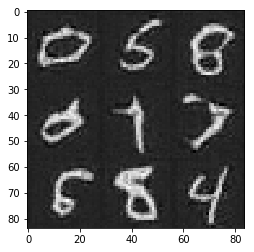

Epoch 2/2... Discriminator Loss: 2.5839... Generator Loss: 0.1355
Epoch 2/2... Discriminator Loss: 1.6127... Generator Loss: 0.4373
Epoch 2/2... Discriminator Loss: 1.2244... Generator Loss: 0.6937
Epoch 2/2... Discriminator Loss: 2.6247... Generator Loss: 0.1137


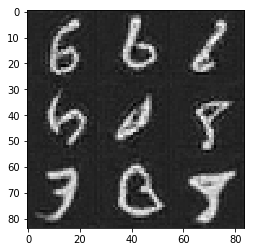

Epoch 2/2... Discriminator Loss: 2.3495... Generator Loss: 0.2118
Epoch 2/2... Discriminator Loss: 1.8115... Generator Loss: 0.3120
Epoch 2/2... Discriminator Loss: 1.6396... Generator Loss: 0.3613
Epoch 2/2... Discriminator Loss: 1.5591... Generator Loss: 0.4483


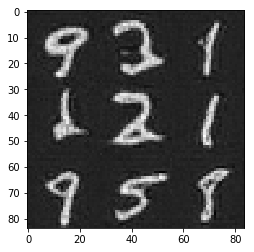

Epoch 2/2... Discriminator Loss: 2.2181... Generator Loss: 0.2217
Epoch 2/2... Discriminator Loss: 2.5063... Generator Loss: 0.1817
Epoch 2/2... Discriminator Loss: 3.3745... Generator Loss: 0.0720
Epoch 2/2... Discriminator Loss: 2.3526... Generator Loss: 0.1701


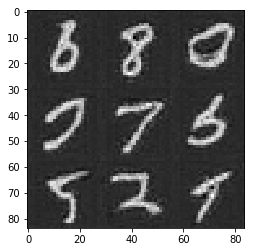

Epoch 2/2... Discriminator Loss: 2.4809... Generator Loss: 0.1736
Epoch 2/2... Discriminator Loss: 2.1963... Generator Loss: 0.1948
Epoch 2/2... Discriminator Loss: 2.9151... Generator Loss: 0.1096
Epoch 2/2... Discriminator Loss: 0.8116... Generator Loss: 1.1796


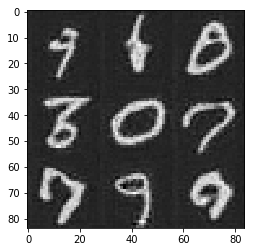

Epoch 2/2... Discriminator Loss: 0.3950... Generator Loss: 3.2688
Epoch 2/2... Discriminator Loss: 0.7766... Generator Loss: 1.1654
Epoch 2/2... Discriminator Loss: 2.9756... Generator Loss: 0.0856
Epoch 2/2... Discriminator Loss: 2.6218... Generator Loss: 0.1632


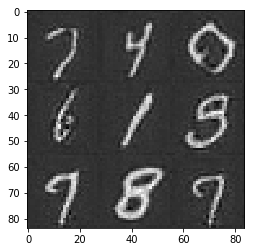

Epoch 2/2... Discriminator Loss: 1.5760... Generator Loss: 0.5230
Epoch 2/2... Discriminator Loss: 1.7569... Generator Loss: 0.3164
Epoch 2/2... Discriminator Loss: 2.2947... Generator Loss: 0.1958
Epoch 2/2... Discriminator Loss: 2.5373... Generator Loss: 0.1372


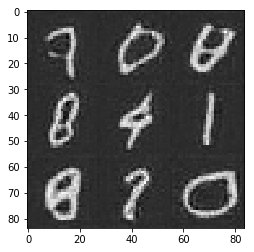

Epoch 2/2... Discriminator Loss: 2.4743... Generator Loss: 0.1600
Epoch 2/2... Discriminator Loss: 2.2492... Generator Loss: 0.1821
Epoch 2/2... Discriminator Loss: 1.7129... Generator Loss: 0.3836
Epoch 2/2... Discriminator Loss: 1.6660... Generator Loss: 0.3915


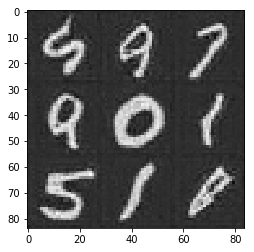

Epoch 2/2... Discriminator Loss: 1.3351... Generator Loss: 0.4977
Epoch 2/2... Discriminator Loss: 0.7207... Generator Loss: 5.5687
Epoch 2/2... Discriminator Loss: 1.4047... Generator Loss: 0.4854
Epoch 2/2... Discriminator Loss: 2.0037... Generator Loss: 0.2546


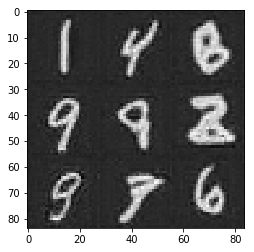

Epoch 2/2... Discriminator Loss: 2.5152... Generator Loss: 0.1510
Epoch 2/2... Discriminator Loss: 1.7145... Generator Loss: 0.7199
Epoch 2/2... Discriminator Loss: 1.0251... Generator Loss: 0.7901
Epoch 2/2... Discriminator Loss: 2.2547... Generator Loss: 0.2129


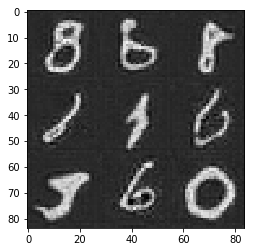

Epoch 2/2... Discriminator Loss: 2.4845... Generator Loss: 0.1494
Epoch 2/2... Discriminator Loss: 2.3915... Generator Loss: 0.1591
Epoch 2/2... Discriminator Loss: 2.7528... Generator Loss: 0.1197
Epoch 2/2... Discriminator Loss: 2.4751... Generator Loss: 0.1396


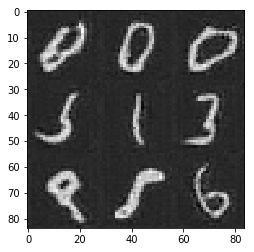

Epoch 2/2... Discriminator Loss: 1.0789... Generator Loss: 0.8324
Epoch 2/2... Discriminator Loss: 1.1378... Generator Loss: 0.7742


In [13]:
batch_size = 16
z_dim = 50
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
batch_size = None
z_dim = 100
learning_rate = None
beta1 = None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.